# **Import libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots

from wordcloud import WordCloud

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')


# es para que las graficas siempre se queden en el notebook

import datetime as dt

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

# Read the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/fifa-22-complete-player-dataset/players_22.csv")
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

# **Descriptive Analysis**

In [3]:
df.describe().T.style.background_gradient(cmap = 'YlGn')

# Statistical Analysis

In [4]:
print("Before handling the missing values, the dataset has : ",df.shape[0],"rows and " ,df.shape[1],"columns")

Before handling the missing values, the dataset has :  19239 rows and  110 columns


In [5]:
# Handling missing values

for c in df.columns:
    print('{} -   {}%'.format(c,round((np.mean(df[c].isnull()))*100)))

sofifa_id -   0%
player_url -   0%
short_name -   0%
long_name -   0%
player_positions -   0%
overall -   0%
potential -   0%
value_eur -   0%
wage_eur -   0%
age -   0%
dob -   0%
height_cm -   0%
weight_kg -   0%
club_team_id -   0%
club_name -   0%
league_name -   0%
league_level -   0%
club_position -   0%
club_jersey_number -   0%
club_loaned_from -   94%
club_joined -   6%
club_contract_valid_until -   0%
nationality_id -   0%
nationality_name -   0%
nation_team_id -   96%
nation_position -   96%
nation_jersey_number -   96%
preferred_foot -   0%
weak_foot -   0%
skill_moves -   0%
international_reputation -   0%
work_rate -   0%
body_type -   0%
real_face -   0%
release_clause_eur -   6%
player_tags -   93%
player_traits -   51%
pace -   11%
shooting -   11%
passing -   11%
dribbling -   11%
defending -   11%
physic -   11%
attacking_crossing -   0%
attacking_finishing -   0%
attacking_heading_accuracy -   0%
attacking_short_passing -   0%
attacking_volleys -   0%
skill_dribblin

In [6]:
col = []
for c in df.columns:
    missingVal = np.mean(df[c].isnull())*100
    if missingVal > 60:
        print('{} - {}%'.format(c, round(missingVal)))
        col.append(c)
print("\n")
print('Columns needed to drop :  \n\n',col)

club_loaned_from - 94%
nation_team_id - 96%
nation_position - 96%
nation_jersey_number - 96%
player_tags - 93%
goalkeeping_speed - 89%
nation_logo_url - 96%


Columns needed to drop :  

 ['club_loaned_from', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'player_tags', 'goalkeeping_speed', 'nation_logo_url']


In [7]:
df.drop(columns = ['club_loaned_from',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'player_tags',
 'goalkeeping_speed',
 'nation_logo_url'] ,inplace = True)

In [8]:
print("After handling the missing values, the dataset has : ",df.shape[0],"rows and " ,df.shape[1],"columns")

After handling the missing values, the dataset has :  19239 rows and  103 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 103 entries, sofifa_id to nation_flag_url
dtypes: float64(13), int64(44), object(46)
memory usage: 15.1+ MB


In [10]:
# check the datatypes of features

df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
gk                  object
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_flag_url     object
Length: 103, dtype: object

In [11]:
num_cols = []
for c in df.columns:
    if df[c].dtype == 'int64':
        num_cols.append(c)
print(num_cols)

['sofifa_id', 'overall', 'potential', 'age', 'height_cm', 'weight_kg', 'nationality_id', 'weak_foot', 'skill_moves', 'international_reputation', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']


In [12]:
nums = num_cols.copy()
del nums[0]
nums

['overall',
 'potential',
 'age',
 'height_cm',
 'weight_kg',
 'nationality_id',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

# Regression Analysis

In [13]:
#Most common player position can be one of the important factors
pp = df['player_positions'].value_counts().head(10)
pp

CB         2423
GK         2132
ST         1770
CDM, CM     953
CM          726
CM, CDM     687
LB          616
RB          576
CB, RB      295
CDM         294
Name: player_positions, dtype: int64

CB, GK, ST, CDM, CM are the most common positions.

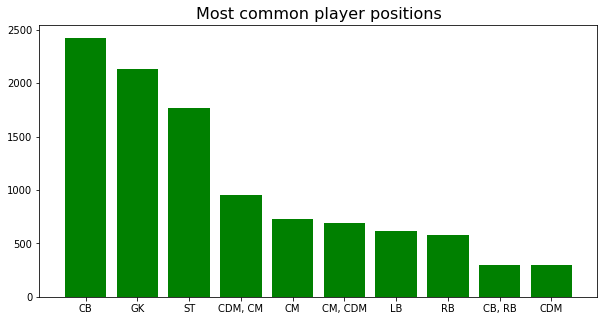

In [14]:
player_pos_count = pp.values
player_pos = pp.index
plt.figure(figsize= (10,5))
plt.bar(player_pos,player_pos_count,color = 'green')
plt.title('Most common player positions', fontsize=16)
plt.show()

Center back is the most common player position.

There are maximum players who play as GoalKeeper and Striker.

Very few player plays on center back,Right back position and Central Defensive Midfielder.

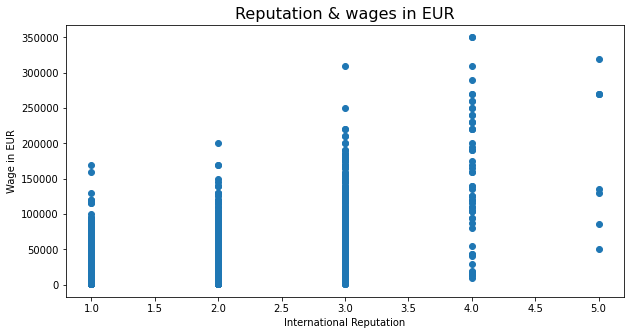

In [15]:
#Relationship between International reputation and Wages

fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data = df, x= 'international_reputation', y='wage_eur')
plt.xlabel("International Reputation") 
plt.ylabel("Wage in EUR")
plt.title("Reputation & wages in EUR", fontsize = 16)
plt.show()

International reputation plays important role in wages of the player

In [16]:
# Countries with f=good skill moves

df_skill = df[df.skill_moves == 5]
df_skill['nationality_name'].value_counts()

Brazil                 12
Portugal                6
France                  6
Argentina               6
England                 2
Morocco                 2
Colombia                2
Congo DR                2
Ukraine                 1
Republic of Ireland     1
Thailand                1
Gambia                  1
Romania                 1
Germany                 1
Switzerland             1
Mexico                  1
Norway                  1
Côte d'Ivoire           1
Slovenia                1
Sweden                  1
Netherlands             1
Algeria                 1
Spain                   1
Scotland                1
Name: nationality_name, dtype: int64

Brazil, Portugal, France and Argentina has players with best skill moves            

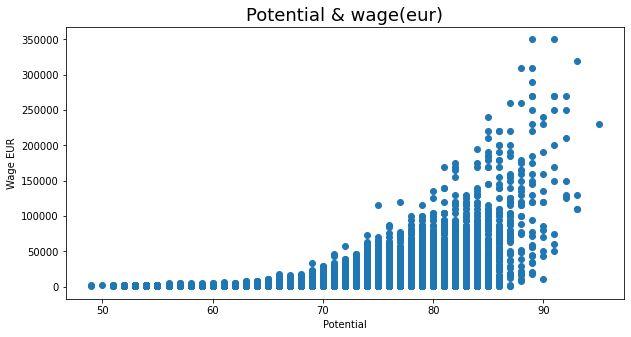

In [17]:
# Relation between potential and wages of the player
plt.figure(figsize = (10,5))
plt.scatter(data = df, x = 'potential',y = 'wage_eur')
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage(eur)", fontsize = 18)
plt.show()

We can observe, the wages are dense where the potential is high.

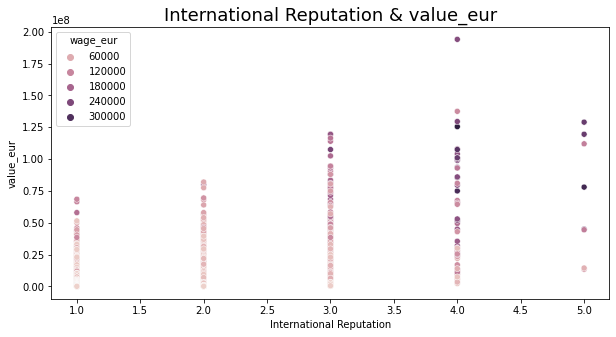

In [18]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(df['international_reputation'],df['value_eur'],hue = df['wage_eur'])
plt.xlabel("International Reputation") 
plt.ylabel("value_eur")
plt.title("International Reputation & value_eur", fontsize = 18)
plt.show()

Good international reputation has better wages and value also increases.

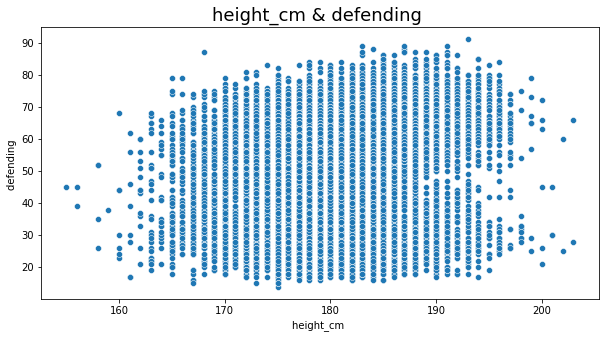

In [19]:
# Rlation between height and defending skills
plt.figure(figsize = (10,5))
ax = sns.scatterplot(df['height_cm'],df['defending'])
plt.xlabel("height_cm ") 
plt.ylabel("defending ")
plt.title("height_cm & defending ", fontsize = 18)
plt.show()

Players with Height between 165cm to 195cm have good defending skills

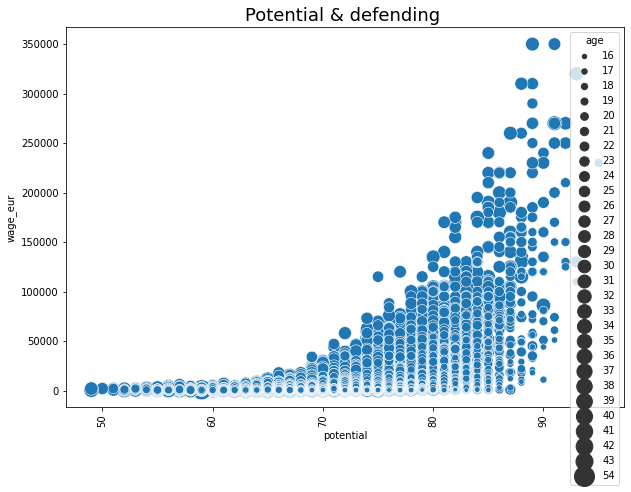

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['potential'] ,y = df['wage_eur'],size=df["age"],sizes=(20, 400), legend="full")
plt.xticks(rotation=90)
plt.title("Potential & defending ", fontsize = 18)
plt.show()

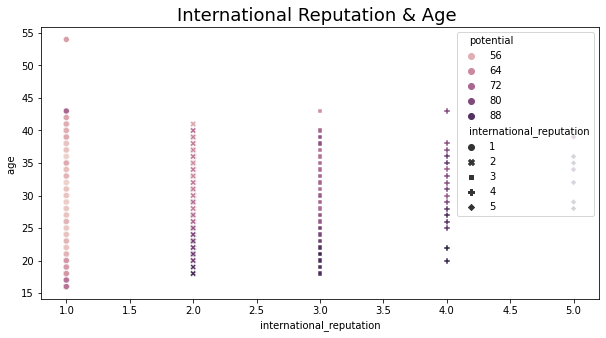

In [21]:
plt.figure(figsize = (10,5))
ax = sns.scatterplot(df['international_reputation'],df['age'],hue = df['potential'],style = df['international_reputation'])
plt.xlabel("international_reputation") 
plt.ylabel("age ")
plt.title("International Reputation & Age ", fontsize = 18)
plt.show()

International reputation is maintained equally for all age groups from low to medium. Oldest age player does not have good international reputation.

It is observed that players with good potential with not so good international reputation.

In [22]:
df['age'].corr(df['international_reputation'])

0.23192714031757017

Age of the player does not play significant role in player's international reputation.

In [23]:
df[df['age'] >= 45][['short_name',"player_positions","overall","potential","height_cm","defending","age","international_reputation"]]

short_name player_positions  overall  potential  height_cm  defending  \
16209   K. Miura               ST       59         59        177       19.0   

       age  international_reputation  
16209   54                         1

K. Miura ,the oldest playest does not have good international reputation and average ratings, potential and defending skills

In [24]:
#Relationship between Age and potential of the player

fig = px.scatter(df, x="age", y="potential",hover_data = ["international_reputation"], title='Age Vs. Potential')
fig.show()

Players between age 16 to 43 has highest potential.

After the age of 36, the potential has been observed medium to low

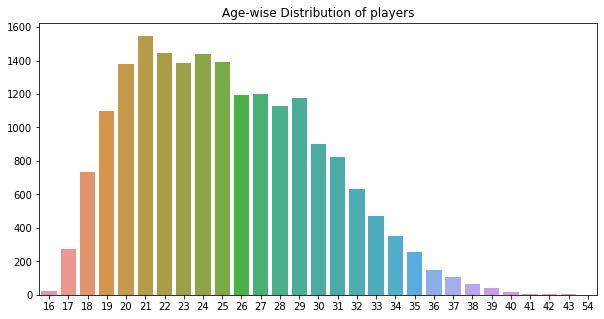

In [25]:
plt.figure(figsize = (10,5))
sns.barplot(x = df["age"].value_counts().index,y=df["age"].value_counts().values)
plt.title('Age-wise Distribution of players')
plt.show()

In [26]:
len(df[df['age'] == 21])

1547

There are 1547 players of age 21 has highest potential.

There are maximum players are of age 21.

In [27]:
fig = px.scatter(df, x="age", y="wage_eur", title='Age Vs. Wages')
fig.show()

Players with Age 26 between 36 earns highest wages.

In [28]:
fig = px.scatter(df, x="age", y="skill_moves",title='Age Vs.Skill moves')
fig.show()

Skill moves are almost equally distributed from age 16 to 40

In [29]:
fig = px.scatter(df, x="age", y='mentality_aggression',title='Age Vs.Mentality aggression')
fig.show()

Mentality Agression is not dependent on age.

In [30]:
fig = px.scatter(df, x="age", y='mentality_interceptions',title='Age Vs.Mentality interceptions')
fig.show()

Mentality interceptions is not dependent on age.

In [31]:
fig = px.scatter(df, x= 'power_jumping', y='mentality_interceptions',title='Power Jumping Vs.Mentality interceptions')
fig.show()

Mentality Interceptions are better for power jumping 46 to 80.

In [32]:
fig = px.bar(df, x= 'skill_ball_control', y='mentality_interceptions',title='Ball Control Vs.Mentality interceptions')
fig.show()

In [33]:

fig = px.bar(df, y= 'skill_long_passing', x='mentality_interceptions',
             title= 'Mentality interceptions Vs. skill_long_passing',
             )
fig.show()

Mentality interceptions between 58 to 66 leads to better long passing.

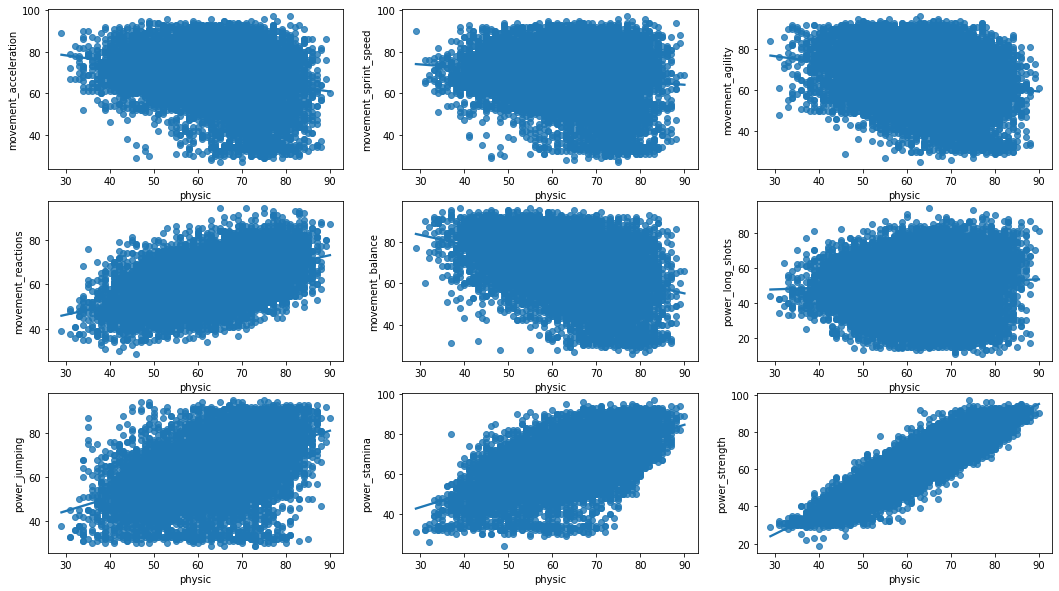

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

sns.regplot(ax=axes[0, 0], data=df, x='physic', y='movement_acceleration')
sns.regplot(ax=axes[0, 1], data=df, x='physic', y='movement_sprint_speed')
sns.regplot(ax=axes[0, 2], data=df, x='physic', y='movement_agility')
sns.regplot(ax=axes[1, 0], data=df, x='physic', y='movement_reactions')
sns.regplot(ax=axes[1, 1], data=df, x='physic', y='movement_balance')
sns.regplot(ax=axes[1, 2], data=df, x='physic', y='power_long_shots')
sns.regplot(ax=axes[2, 0], data=df, x='physic', y= 'power_jumping')
sns.regplot(ax=axes[2, 1], data=df, x='physic', y='power_stamina')
sns.regplot(ax=axes[2, 2], data=df, x='physic', y='power_strength')

plt.show()

Movement Reactions, Power Jumping, Power stamina, Power Strength aee positively correlated with Physic of the player.

Movement Acceleration, Movement Sprint Speed, Movement Agility, Movement Balance and Power Long Shots are negatively correlated with Physic of the player. 

In [35]:

fig = px.bar(df, y= 'goalkeeping_kicking', x='skill_ball_control',
             color = "preferred_foot",
             title= 'Ball_control Vs. Goalkeeping kicking',
             )
fig.show()

In [36]:
fig = px.scatter(df, x="international_reputation", y="potential", title='international_reputation Vs. Potential')
fig.show()

Players have good potential despite of having good international reputation.

There is no average or below average potential for highly reputed players

In [37]:
fig = px.scatter(df, x="potential", y="defending", title='Potential vs. Defending Skills')
fig.show()

Potential and defending skills are highly correlated.

In [38]:
plt.figure(figsize = (10,5))
ax = px.scatter(df, x = 'skill_moves', y = 'age')
ax.show()

<Figure size 720x360 with 0 Axes>

In [39]:
df[df.age == 54][['short_name', 'potential','age','height_cm','weight_kg','nationality_name']]

short_name  potential  age  height_cm  weight_kg nationality_name
16209   K. Miura         59   54        177         72            Japan

K. Miura is the oldest player with good skill moves.

The skills moves has equal distribution over age

In [40]:
# Overall score of the players
df.sort_values(by='overall',ascending=False)[["short_name","overall"]].head(20)

short_name  overall
0            L. Messi       93
1      R. Lewandowski       92
2   Cristiano Ronaldo       91
3           Neymar Jr       91
4        K. De Bruyne       91
5            J. Oblak       91
6           K. Mbappé       91
7            M. Neuer       90
8       M. ter Stegen       90
9             H. Kane       90
10           N. Kanté       90
16            S. Mané       89
21      G. Donnarumma       89
20            Alisson       89
18            Ederson       89
17           M. Salah       89
19         J. Kimmich       89
15        V. van Dijk       89
11         K. Benzema       89
13             H. Son       89

L. Messi, R. Lewandowski,Cristiano Ronaldo,Neymar Jr,K. De Bruyne,J. Oblak and K. Mbappé has highest overall score than the rest of the players.

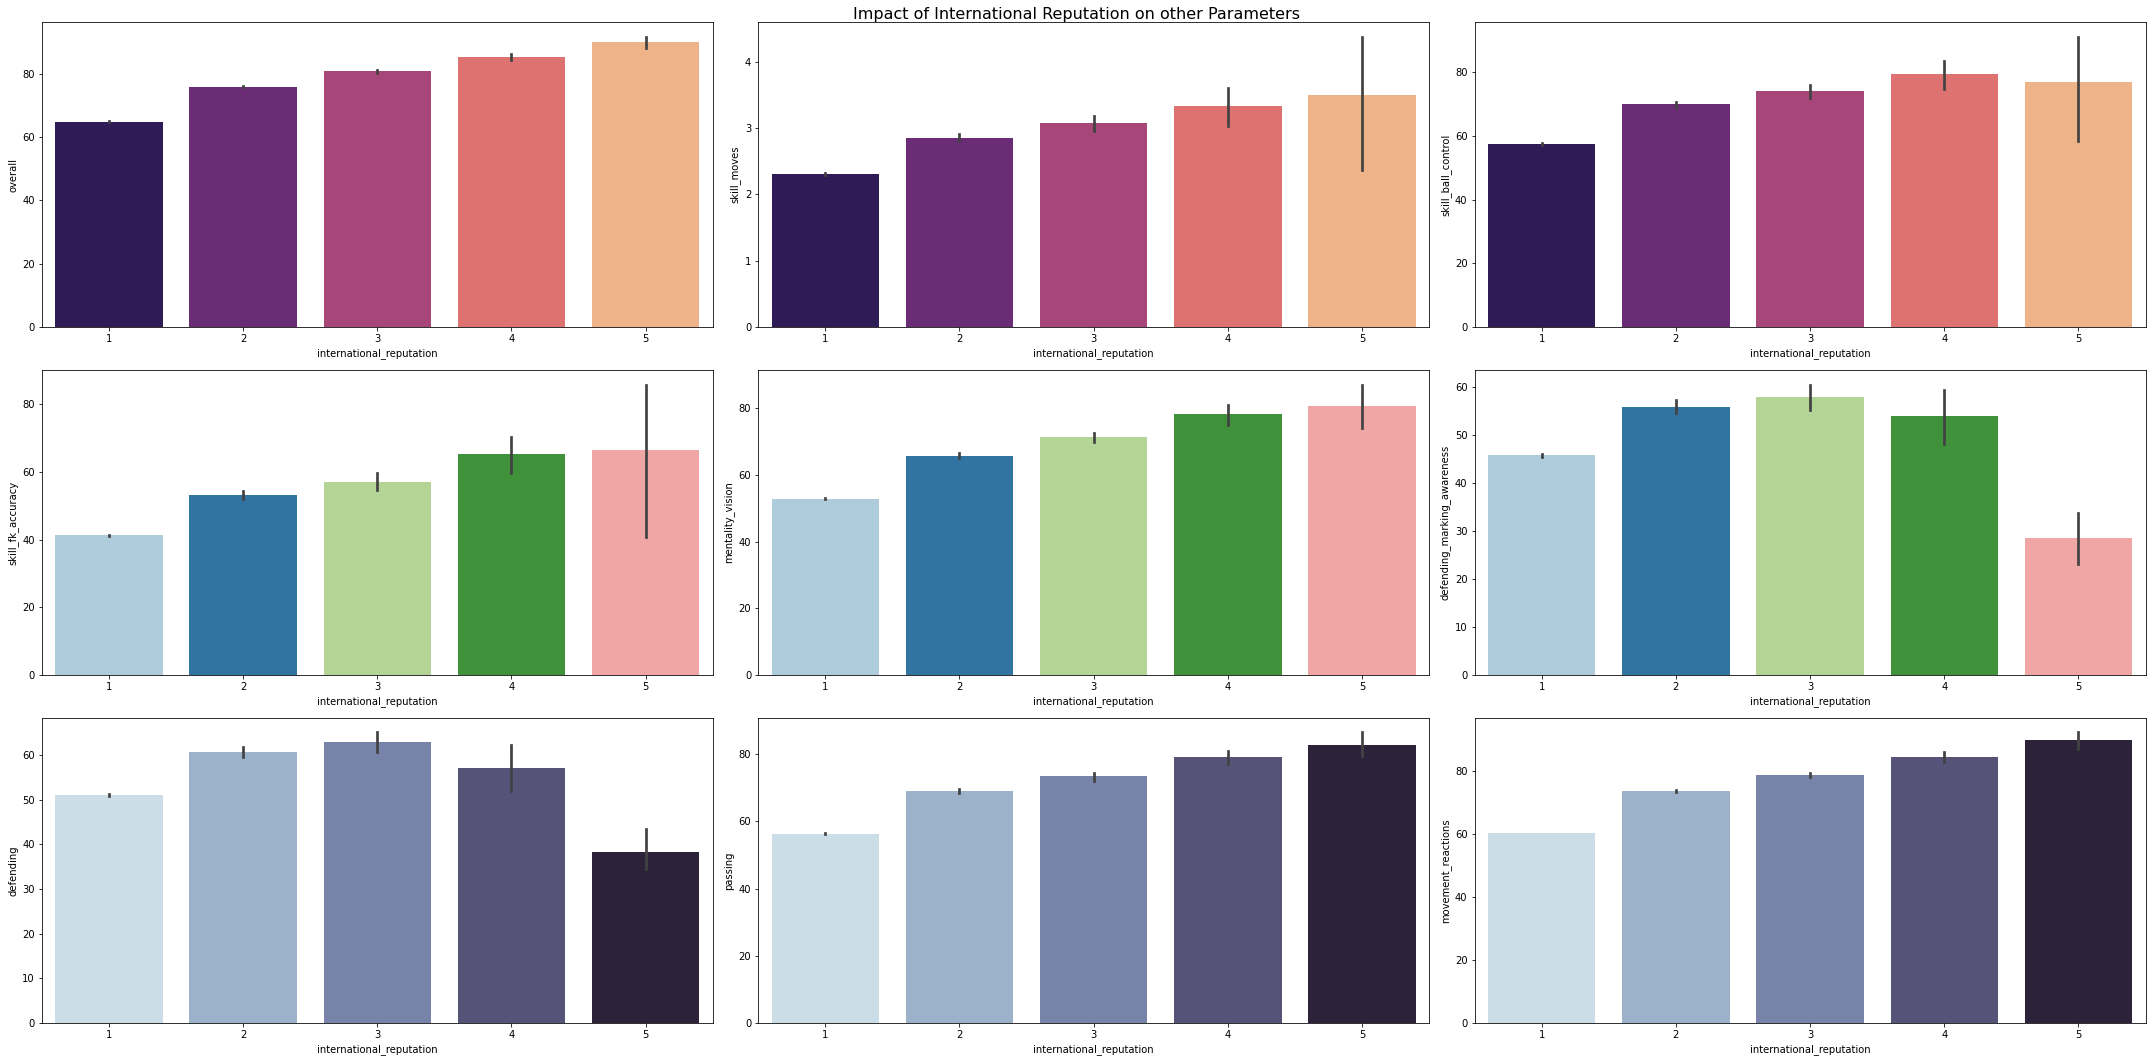

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(30,15))
fig.suptitle('Impact of International Reputation on other Parameters',size = 16)


sns.barplot(ax=axes[0,0],data = df,x= 'international_reputation', y= 'overall',palette = 'magma')

sns.barplot(ax=axes[0,1],data = df, x= 'international_reputation', y= 'skill_moves',palette = "magma")

sns.barplot(ax=axes[0,2],data = df, x= 'international_reputation', y= 'skill_ball_control' ,palette = "magma")

sns.barplot(ax=axes[1,0],data = df, x= 'international_reputation', y= 'skill_fk_accuracy' ,palette = "Paired")

sns.barplot(ax=axes[1,1],data = df, x= 'international_reputation', y= 'mentality_vision',palette = "Paired")

sns.barplot(ax=axes[1,2],data = df, x= 'international_reputation', y= 'defending_marking_awareness',palette = "Paired")

sns.barplot(ax=axes[2,0],data = df, x= 'international_reputation', y= 'defending',palette = "ch:s=.25,rot=-.25")

sns.barplot(ax=axes[2,1],data = df, x= 'international_reputation', y= 'passing',palette = "ch:s=.25,rot=-.25")

sns.barplot(ax=axes[2,2],data = df, x= 'international_reputation', y= 'movement_reactions',palette = "ch:s=.25,rot=-.25")

plt.tight_layout()
plt.show()

overall rating has high impact on International reputation.

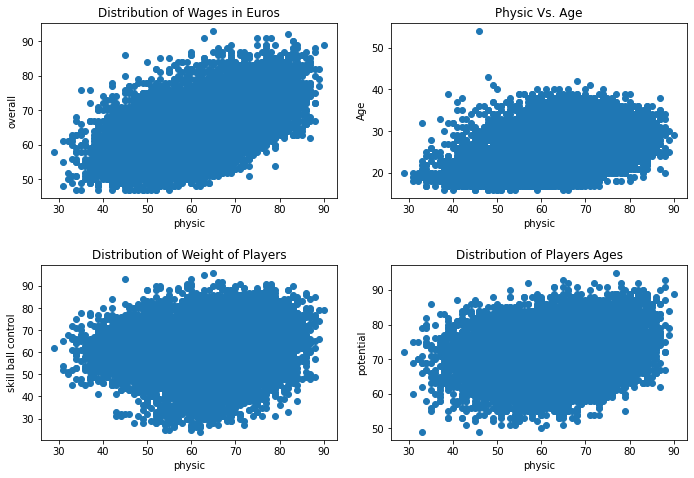

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes[0,0].scatter(df['physic'],df['overall'])
axes[0,0].set_xlabel('physic')
axes[0,0].set_ylabel('overall')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[1,1].scatter(df['physic'],df['potential'])
axes[1,1].set_xlabel('physic')
axes[1,1].set_ylabel('potential')
axes[1,1].set_title('Distribution of Players Ages')

axes[0,1].set_title('Physic Vs. Age')
axes[0,1].scatter(df['physic'],df['age'])
axes[0,1].set_xlabel('physic')
axes[0,1].set_ylabel('Age')


axes[1,0].set_title('Distribution of Weight of Players')
axes[1,0].scatter(df['physic'],df['skill_ball_control'])
axes[1,0].set_xlabel('physic')
axes[1,0].set_ylabel('skill ball control')


plt.tight_layout(pad=2)
plt.show()

 Good physic contributes to better  overall score , potential, age, skill_ball_control .

In [43]:
px.bar( df, x='mentality_vision', y='movement_reactions',
             hover_data=['nationality_name', 'overall'],
             title='', height=400)

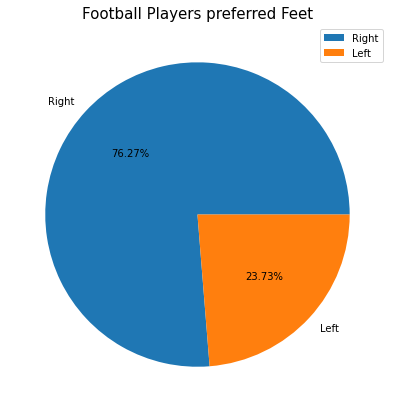

In [44]:
plt.figure(figsize = (10,7))
plt.pie(df.preferred_foot.value_counts().values,labels= df.preferred_foot.value_counts().index,autopct='%1.2f%%')
plt.title('Football Players preferred Feet',color = 'black',fontsize = 15)
plt.legend()
plt.show()

Most of the players prefer right leg while playing

In [45]:
df.groupby(['preferred_foot']).count()[['sofifa_id']].style.background_gradient(cmap = 'Wistia')

14679 players are preferring right foot to play and rest of 4565 players are preferring left leg while playing.

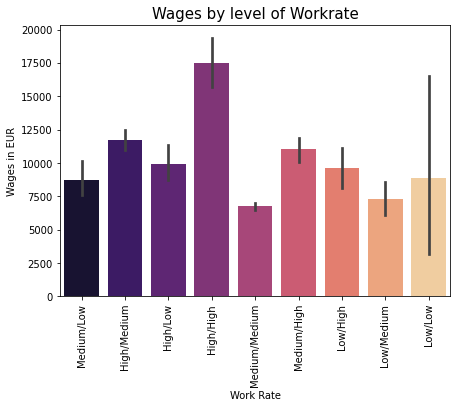

In [46]:
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(df["work_rate"],df['wage_eur'],palette = 'magma')
plt.xlabel("Work Rate") 
plt.ylabel("Wages in EUR")
plt.xticks(rotation = 90)
plt.title("Wages by level of Workrate", fontsize = 15)
plt.show()

Players with high work rate earns high wages in Eur

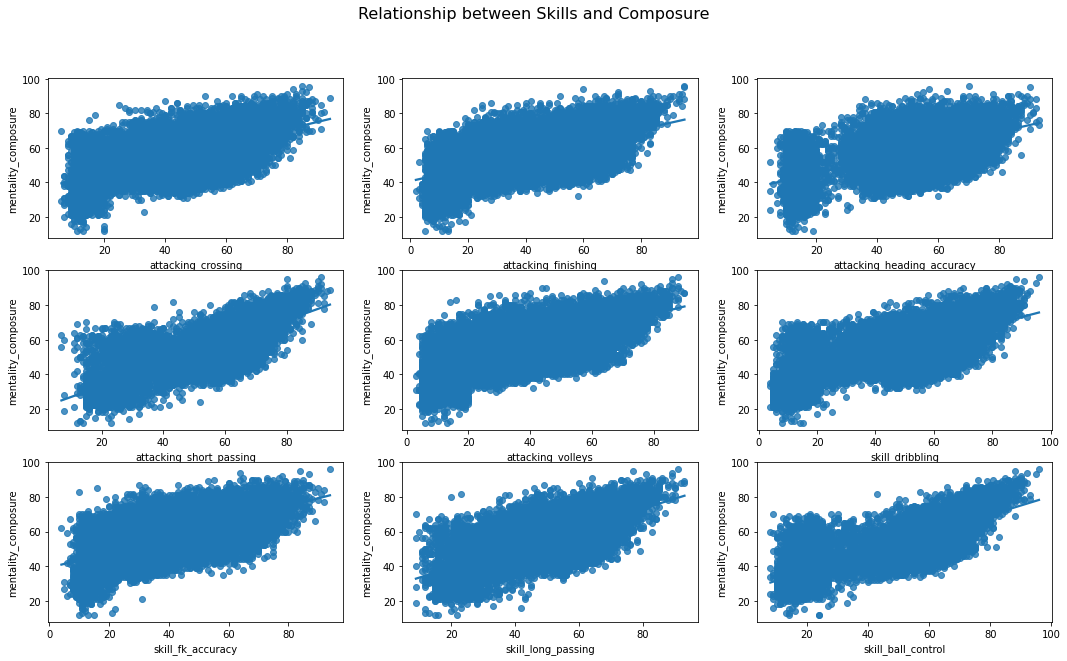

In [47]:
   
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
plt.suptitle('Relationship between Skills and Composure', size = 16)
sns.regplot(ax=axes[0, 0], data=df, x='attacking_crossing', y='mentality_composure')
sns.regplot(ax=axes[0, 1], data=df, x='attacking_finishing', y='mentality_composure')
sns.regplot(ax=axes[0, 2], data=df, x='attacking_heading_accuracy', y='mentality_composure')
sns.regplot(ax=axes[1, 0], data=df, x='attacking_short_passing', y='mentality_composure')
sns.regplot(ax=axes[1, 1], data=df, x='attacking_volleys', y='mentality_composure')
sns.regplot(ax=axes[1, 2], data=df, x='skill_dribbling', y='mentality_composure')
sns.regplot(ax=axes[2, 0], data=df, x='skill_fk_accuracy', y= 'mentality_composure')
sns.regplot(ax=axes[2, 1], data=df, x='skill_long_passing', y='mentality_composure')
sns.regplot(ax=axes[2, 2], data=df, x='skill_ball_control', y='mentality_composure')

plt.show()

Attacking crossing, attacking finishing',attacking heading accuracy,attacking short passing, attackingvolleys,skilldribbling,skillcurve,skill_fk_accuracy,skilllongpassing,skillballcontrol, all these skills are highly dependent on mentality composure.

In [48]:
df[df["work_rate"] == 'High/High'][['short_name',"player_positions","overall","potential","wage_eur","pace","defending",
                                   "physic","power_stamina","power_strength","goalkeeping_kicking"]]

short_name player_positions  overall  potential  wage_eur  pace  \
4         K. De Bruyne          CM, CAM       91         91  350000.0  76.0   
9              H. Kane               ST       90         90  240000.0  70.0   
13              H. Son       LM, CF, LW       89         89  220000.0  88.0   
14            Casemiro              CDM       89         89  310000.0  65.0   
28     Bruno Fernandes              CAM       88         89  250000.0  75.0   
...                ...              ...      ...        ...       ...   ...   
18756        C. Torres           RW, ST       52         71     500.0  64.0   
18854  N. Moriah-Welsh               CM       52         65    3000.0  66.0   
19053     Kang Jae Woo           ST, CM       50         63     700.0  64.0   
19100       J. Russell          CM, CDM       49         49     500.0  32.0   
19121         P. Ferry               ST       49         59     500.0  68.0   

       defending  physic  power_stamina  power_strength  goalkeeping_kicking  
4           64.0    78.0             89              74                    5  
9           47.0    83.0             83              85                   11  
13          43.0    69.0             88              64                   13  
14          86.0    90.0             89              90                   16  
28          70.0    77.0             91              70                   15  
...          ...     ...            ...             ...                  ...  
18756       23.0    43.0             44              44                   13  
18854       41.0    55.0             68              46                    8  
19053       46.0    57.0             60              54                    7  
19100       51.0    46.0             30              48                   15  
19121       17.0    43.0             53              40                   14  

[1099 rows x 11 columns]

High work rate has high wages and also the players has high potential and overall rating

In [49]:
for i in nums:
    print('The range of', i + ' is between' , df[i].min() , 'and' , df[i].max())

The range of overall is between 47 and 93
The range of potential is between 49 and 95
The range of age is between 16 and 54
The range of height_cm is between 155 and 206
The range of weight_kg is between 49 and 110
The range of nationality_id is between 1 and 219
The range of weak_foot is between 1 and 5
The range of skill_moves is between 1 and 5
The range of international_reputation is between 1 and 5
The range of attacking_crossing is between 6 and 94
The range of attacking_finishing is between 2 and 95
The range of attacking_heading_accuracy is between 5 and 93
The range of attacking_short_passing is between 7 and 94
The range of attacking_volleys is between 3 and 90
The range of skill_dribbling is between 4 and 96
The range of skill_curve is between 6 and 94
The range of skill_fk_accuracy is between 4 and 94
The range of skill_long_passing is between 9 and 93
The range of skill_ball_control is between 8 and 96
The range of movement_acceleration is between 14 and 97
The range of mo

In [50]:
df.loc[[df['power_jumping'].idxmax()]][['wage_eur','short_name','potential','international_reputation','age','player_positions'
 ,'overall','nationality_name','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_stamina']].set_index('short_name')

wage_eur  potential  international_reputation  age  \
short_name                                                              
Cristiano Ronaldo  270000.0         91                         5   36   

                  player_positions  overall nationality_name  \
short_name                                                     
Cristiano Ronaldo           ST, LW       91         Portugal   

                   movement_sprint_speed  movement_agility  \
short_name                                                   
Cristiano Ronaldo                     88                86   

                   movement_reactions  movement_balance  power_stamina  
short_name                                                              
Cristiano Ronaldo                  94                74             77

Cristiano Ronaldo jumps highest with an excellent physic and very good skills to win the game.

In [51]:
px.bar(df,x="height_cm",y = "power_jumping",hover_data=['skill_fk_accuracy',"international_reputation"]
       ,color = 'power_stamina')

In [52]:
df.sort_values(by = 'nationality_name',ascending=False).head(5)

sofifa_id                                         player_url  \
12659     234743  https://sofifa.com/player/234743/admiral-muskw...   
2167      218154  https://sofifa.com/player/218154/khama-billiat...   
1758      222994  https://sofifa.com/player/222994/marvelous-nak...   
8974      213634  https://sofifa.com/player/213634/macauley-bonn...   
6142      239438  https://sofifa.com/player/239438/teenage-hadeb...   

       short_name                  long_name player_positions  overall  \
12659   A. Muskwe  Admiral Dalindlela Muskwe               ST       63   
2167   K. Billiat              Khama Billiat       CF, RW, ST       74   
1758   M. Nakamba          Marvelous Nakamba          CDM, CM       75   
8974     M. Bonne       Macauley Miles Bonne               ST       66   
6142    T. Hadebe     Teenage Lingani Hadebe               CB       69   

       potential  value_eur  wage_eur  age  ...    lb   lcb    cb   rcb    rb  \
12659         72  1100000.0    3000.0   22  ...  43+2  43+2  43+2  43+2  43+2   
2167          74  4100000.0    1000.0   30  ...  61+2  55+2  55+2  55+2  61+2   
1758          77  6000000.0   49000.0   27  ...  71+2  73+2  73+2  73+2  71+2   
8974          70  1200000.0    6000.0   25  ...  47+2  46+2  46+2  46+2  47+2   
6142          73  1700000.0    4000.0   25  ...  64+2  69+2  69+2  69+2  64+2   

         gk                                    player_face_url  \
12659  16+2  https://cdn.sofifa.net/players/234/743/22_120.png   
2167   16+2  https://cdn.sofifa.net/players/218/154/22_120.png   
1758   18+2  https://cdn.sofifa.net/players/222/994/22_120.png   
8974   15+2  https://cdn.sofifa.net/players/213/634/22_120.png   
6142   17+2  https://cdn.sofifa.net/players/239/438/22_120.png   

                                    club_logo_url  \
12659    https://cdn.sofifa.net/teams/1923/60.png   
2167   https://cdn.sofifa.net/teams/110929/60.png   
1758        https://cdn.sofifa.net/teams/2/60.png   
8974       https://cdn.sofifa.net/teams/94/60.png   
6142      https://cdn.sofifa.net/teams/698/60.png   

                                 club_flag_url  \
12659  https://cdn.sofifa.net/flags/gb-eng.png   
2167       https://cdn.sofifa.net/flags/za.png   
1758   https://cdn.sofifa.net/flags/gb-eng.png   
8974   https://cdn.sofifa.net/flags/gb-eng.png   
6142       https://cdn.sofifa.net/flags/us.png   

                           nation_flag_url  
12659  https://cdn.sofifa.net/flags/zw.png  
2167   https://cdn.sofifa.net/flags/zw.png  
1758   https://cdn.sofifa.net/flags/zw.png  
8974   https://cdn.sofifa.net/flags/zw.png  
6142   https://cdn.sofifa.net/flags/zw.png  

[5 rows x 103 columns]

In [53]:
nn = df['nationality_name'].value_counts().head(30)
nn

England                1719
Germany                1214
Spain                  1086
France                  980
Argentina               960
Brazil                  897
Japan                   546
Netherlands             439
United States           413
Poland                  403
China PR                385
Sweden                  385
Norway                  379
Republic of Ireland     374
Portugal                373
Saudi Arabia            355
Mexico                  352
Romania                 338
Italy                   338
Korea Republic          325
Colombia                322
Belgium                 321
Austria                 319
Denmark                 307
Scotland                293
Turkey                  291
Uruguay                 280
Australia               266
India                   223
Venezuela               212
Name: nationality_name, dtype: int64

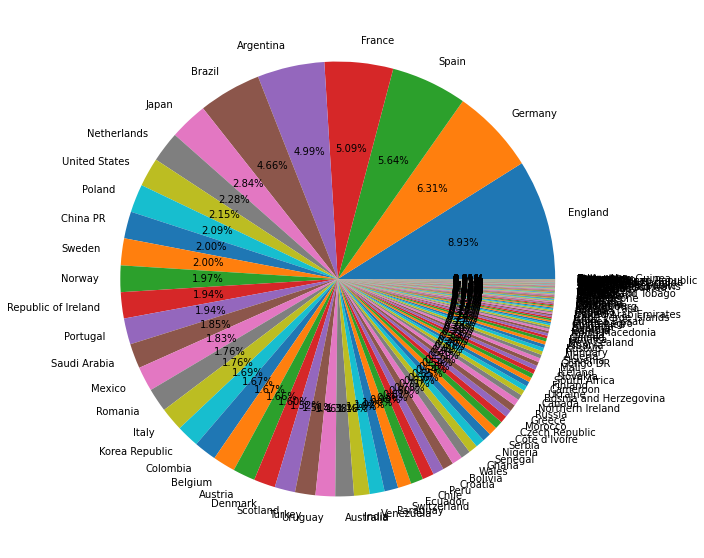

In [54]:
plt.figure(figsize=(20,10))
plt.pie(df['nationality_name'].value_counts().values ,labels= df['nationality_name'].value_counts().index,autopct='%1.2f%%')
plt.show()

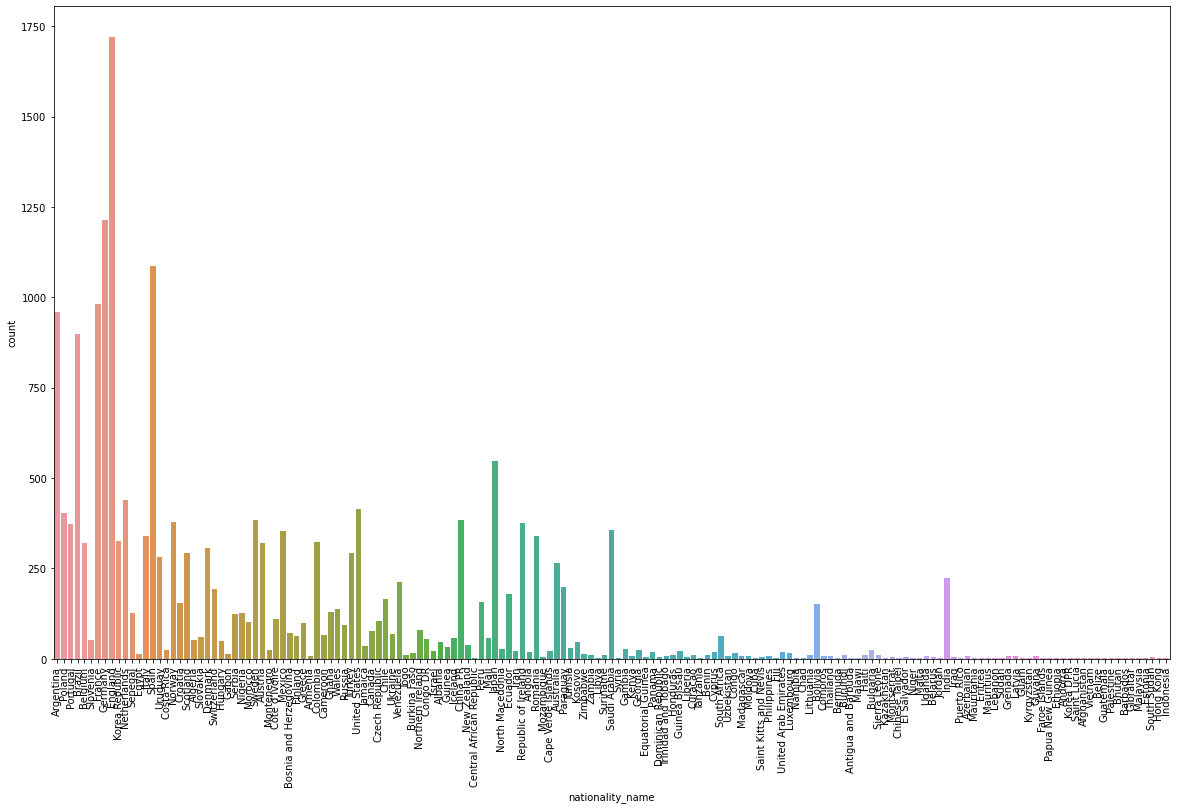

In [55]:
plt.figure(figsize=(20,12))
sns.countplot(x = df['nationality_name'])
plt.xticks(rotation=90)
plt.show()

England,Germany,Spain,France,Argentina and Brazil has presented highest number of times.

In [56]:
df.sort_values(by = 'mentality_vision')

sofifa_id                                         player_url  \
14430     202583  https://sofifa.com/player/202583/evan-newton/2...   
3280      202873  https://sofifa.com/player/202873/kevin-muller/...   
13582     223174  https://sofifa.com/player/223174/onurcan-piri/...   
14456     209895  https://sofifa.com/player/209895/matthew-acton...   
12570     228562  https://sofifa.com/player/228562/raphael-salli...   
...          ...                                                ...   
509           41  https://sofifa.com/player/41/andres-iniesta-lu...   
41        211110  https://sofifa.com/player/211110/paulo-dybala/...   
108       198706  https://sofifa.com/player/198706/luis-alberto-...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
0         158023  https://sofifa.com/player/158023/lionel-messi/...   

         short_name                       long_name player_positions  overall  \
14430     E. Newton           Evan Alexander Newton               GK       61   
3280      K. Müller                    Kevin Müller               GK       72   
13582       O. Piri                    Onurcan Piri               GK       62   
14456      M. Acton                   Matthew Acton               GK       61   
12570  R. Sallinger         Raphael Lukas Sallinger               GK       63   
...             ...                             ...              ...      ...   
509         Iniesta            Andrés Iniesta Luján          CM, CAM       79   
41        P. Dybala     Paulo Bruno Exequiel Dybala          CF, CAM       87   
108    Luis Alberto   Luis Alberto Romero Alconchel      CAM, CM, CF       84   
4      K. De Bruyne                 Kevin De Bruyne          CM, CAM       91   
0          L. Messi  Lionel Andrés Messi Cuccittini       RW, ST, CF       93   

       potential    value_eur  wage_eur  age  ...    lb   lcb    cb   rcb  \
14430         61     110000.0    1000.0   33  ...  23+2  27+2  27+2  27+2   
3280          72    1600000.0   13000.0   30  ...  24+2  27+2  27+2  27+2   
13582         66     425000.0    2000.0   26  ...  17+2  19+2  19+2  19+2   
14456         63     275000.0    1000.0   29  ...  26+2  27+2  27+2  27+2   
12570         67     525000.0    1000.0   25  ...  27+2  28+2  28+2  28+2   
...          ...          ...       ...  ...  ...   ...   ...   ...   ...   
509           79    5500000.0   10000.0   37  ...  63+3  61+3  61+3  61+3   
41            88   93000000.0  160000.0   27  ...  62+3  52+3  52+3  52+3   
108           84   42500000.0   95000.0   28  ...  65+2  59+2  59+2  59+2   
4             91  125500000.0  350000.0   30  ...  75+3  69+3  69+3  69+3   
0             93   78000000.0  320000.0   34  ...  61+3  50+3  50+3  50+3   

         rb    gk                                    player_face_url  \
14430  23+2  60+1  https://cdn.sofifa.net/players/202/583/22_120.png   
3280   24+2  71+1  https://cdn.sofifa.net/players/202/873/22_120.png   
13582  17+2  61+2  https://cdn.sofifa.net/players/223/174/22_120.png   
14456  26+2  60+2  https://cdn.sofifa.net/players/209/895/22_120.png   
12570  27+2  62+2  https://cdn.sofifa.net/players/228/562/22_120.png   
...     ...   ...                                                ...   
509    63+3  16+3  https://cdn.sofifa.net/players/000/041/22_120.png   
41     62+3  14+3  https://cdn.sofifa.net/players/211/110/22_120.png   
108    65+2  16+2  https://cdn.sofifa.net/players/198/706/22_120.png   
4      75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   
0      61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   

                                    club_logo_url  \
14430  https://cdn.sofifa.net/teams/101112/60.png   
3280   https://cdn.sofifa.net/teams/111235/60.png   
13582  https://cdn.sofifa.net/teams/112120/60.png   
14456  https://cdn.sofifa.net/teams/111397/60.png   
12570    https://cdn.sofifa.net/teams/2017/60.png   
...                                           ...   
509    https://cdn.s

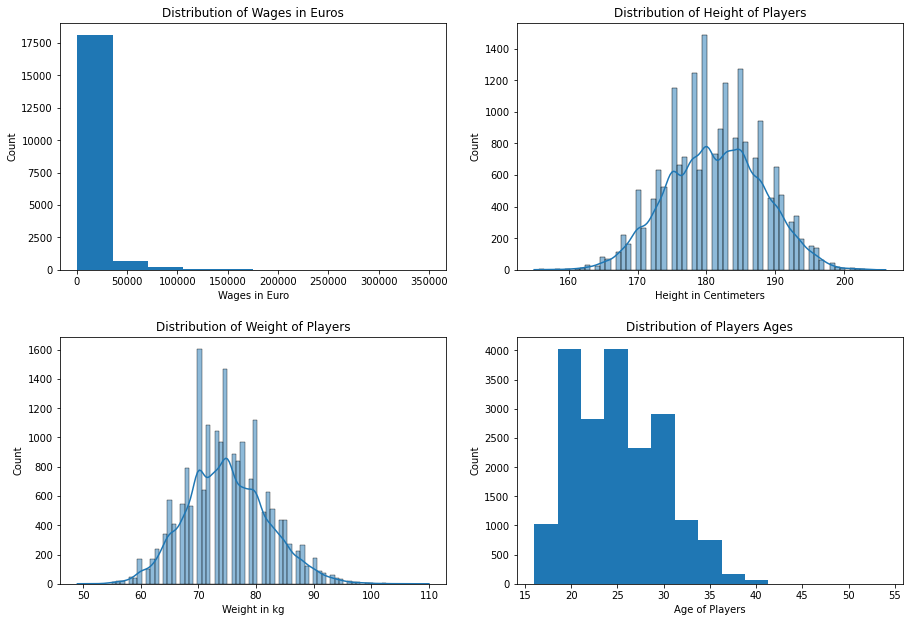

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(df['wage_eur'])
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[1,1].hist(df['age'], bins = 15)
axes[1,1].set_xlabel('Age of Players')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Distribution of Players Ages')
# first two is using a matplotlib syntax, the next two I'll do with seaborn 

axes[0,1].set_title('Distribution of Height of Players')
sns.histplot(df, x='height_cm', ax=axes[0,1], kde=True)
axes[0,1].set_xlabel('Height in Centimeters')
axes[0,1].set_ylabel('Count')


axes[1,0].set_title('Distribution of Weight of Players')
sns.histplot(df, x='weight_kg', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Weight in kg')
axes[1,0].set_ylabel('Count')


plt.tight_layout(pad=2)
plt.show()

In [58]:
df['age'].value_counts()

21    1547
22    1446
24    1442
25    1394
23    1387
20    1377
27    1200
26    1197
29    1178
28    1129
19    1099
30     901
31     825
18     733
32     634
33     468
34     354
17     271
35     258
36     146
37     105
38      62
39      39
16      20
40      14
41       7
43       3
42       2
54       1
Name: age, dtype: int64

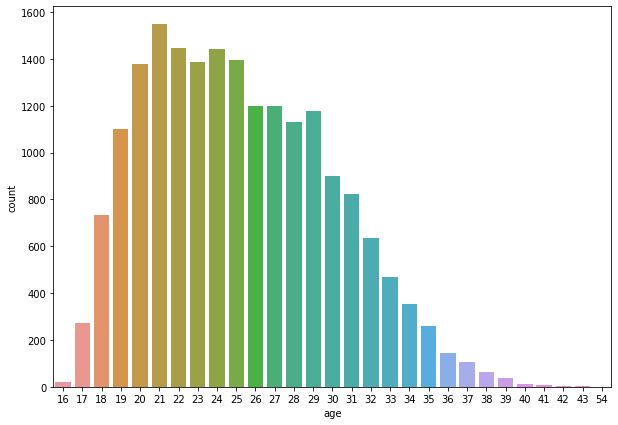

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(df['age'])
plt.show()

The maximum players are young players of age 21. There are very few players of age 16 and 40 onwards. 

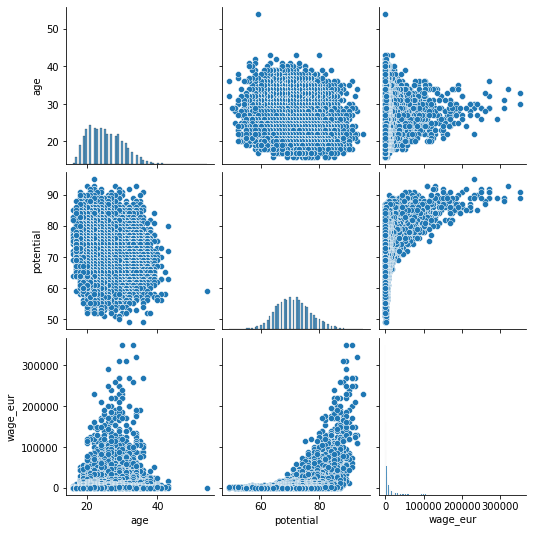

In [60]:
sns.pairplot(data = df[["age","potential","wage_eur"]])

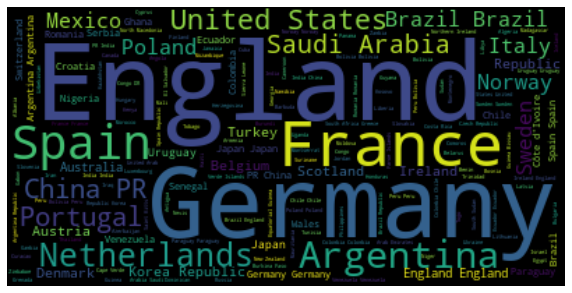

In [61]:
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

England, Germany, France, Spain and Argentina has highest presentation in year 2022

# **Analysis of Top players**

In [62]:
top20 = df.sort_values(by = "overall",ascending=False).head(20)

top20.drop(columns = ['sofifa_id','player_url'])

short_name                            long_name player_positions  \
0            L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1      R. Lewandowski                   Robert Lewandowski               ST   
2   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3           Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4        K. De Bruyne                      Kevin De Bruyne          CM, CAM   
5            J. Oblak                            Jan Oblak               GK   
6           K. Mbappé                 Kylian Mbappé Lottin           ST, LW   
7            M. Neuer                   Manuel Peter Neuer               GK   
8       M. ter Stegen                Marc-André ter Stegen               GK   
9             H. Kane                           Harry Kane               ST   
10           N. Kanté                         N'Golo Kanté          CDM, CM   
16            S. Mané                           Sadio Mané               LW   
21      G. Donnarumma                 Gianluigi Donnarumma               GK   
20            Alisson                Alisson Ramsés Becker               GK   
18            Ederson            Ederson Santana de Moraes               GK   
17           M. Salah                  Mohamed Salah Ghaly               RW   
19         J. Kimmich                Joshua Walter Kimmich          CDM, RB   
15        V. van Dijk                      Virgil van Dijk               CB   
11         K. Benzema                        Karim Benzema           CF, ST   
13             H. Son                              손흥민 孙兴慜       LM, CF, LW   

    overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0        93         93   78000000.0  320000.0   34  1987-06-24        170   
1        92         92  119500000.0  270000.0   32  1988-08-21        185   
2        91         91   45000000.0  270000.0   36  1985-02-05        187   
3        91         91  129000000.0  270000.0   29  1992-02-05        175   
4        91         91  125500000.0  350000.0   30  1991-06-28        181   
5        91         93  112000000.0  130000.0   28  1993-01-07        188   
6        91         95  194000000.0  230000.0   22  1998-12-20        182   
7        90         90   13500000.0   86000.0   35  1986-03-27        193   
8        90         92   99000000.0  250000.0   29  1992-04-30        187   
9        90         90  129500000.0  240000.0   27  1993-07-28        188   
10       90         90  100000000.0  230000.0   30  1991-03-29        168   
16       89         89  101000000.0  270000.0   29  1992-04-10        175   
21       89         93  119500000.0  110000.0   22  1999-02-25        196   
20       89         90   82000000.0  190000.0   28  1992-10-02        191   
18       89         91   94000000.0  200000.0   27  1993-08-17        188   
17       89         89  101000000.0  270000.0   29  1992-06-15        175   
19       89         90  108000000.0  160000.0   26  1995-02-08        177   
15       89         89   86000000.0  230000.0   29  1991-07-08        193   
11       89         89   66000000.0  350000.0   33  1987-12-19        185   
13       89         89  104000000.0  220000.0   28  1992-07-08        183   

    ...    lb   lcb    cb   rcb    rb    gk  \
0   ...  61+3  50+3  50+3  50+3  61+3  19+3   
1   ...  61+3  60+3  60+3  60+3  61+3  19+3   
2   ...  60+3  53+3  53+3  53+3  60+3  20+3   
3   ...  62+3  50+3  50+3  50+3  62+3  20+3   
4   ...  75+3  69+3  69+3  69+3  75+3  21+3   
5   ...  32+3  33+3  33+3  33+3  32+3  89+3   
6   ...  63+3  54+3  54+3  54+3  63+3  18+3   
7   ...  35+3  34+3  34+3  34+3  35+3  88+2   
8   ...  31+3  33+3  33+3  33+3  31+3  88+3   
9   ...  64+3  61+3  61+3  61+3  64+3  20+3   
10  ...  85+3  84+3  84+3  84+3  85+3  20+3   
16  ...  65+3  59+3  59+3  59+3  65+3  19+3   
21  ...  31+3  31+3  31+3  31+3  31+3  87+3   
20  ...  30+3  31+3  31+3  31+3  30+3  87+3   
18  ...  36+3  35+3  35+3  3

In [63]:
#checking missing values

top20.isnull().sum()

sofifa_id           0
player_url          0
short_name          0
long_name           0
player_positions    0
                   ..
gk                  0
player_face_url     0
club_logo_url       0
club_flag_url       0
nation_flag_url     0
Length: 103, dtype: int64

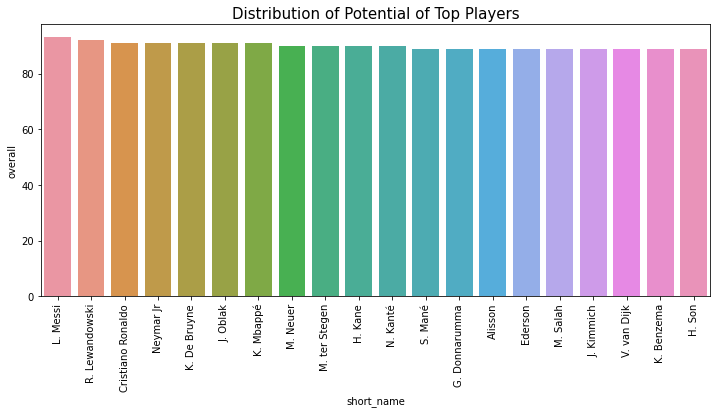

In [64]:
plt.figure(figsize=(12,5))
sns.barplot(x=top20['short_name'] ,y = top20['overall'])
plt.xticks(rotation=90)
plt.title('Distribution of Potential of Top Players', size = 15)
plt.show()

We can barely observe the huge difference in top 20 players' overall performance. 

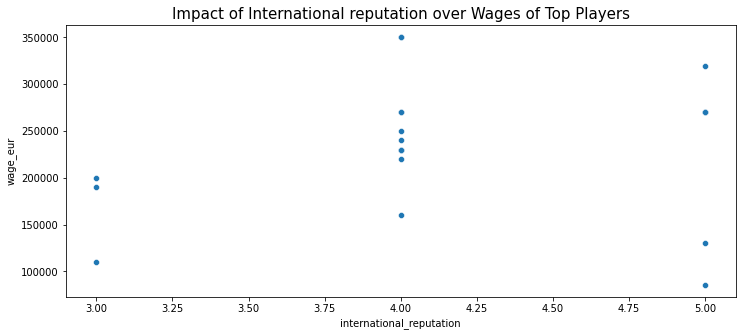

In [65]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=top20['international_reputation'] ,y = top20['wage_eur'])
plt.xticks(rotation=0)
plt.title('Impact of International reputation over Wages of Top Players', size = 15)
plt.show()

The international reputation has no significant impact over wages.

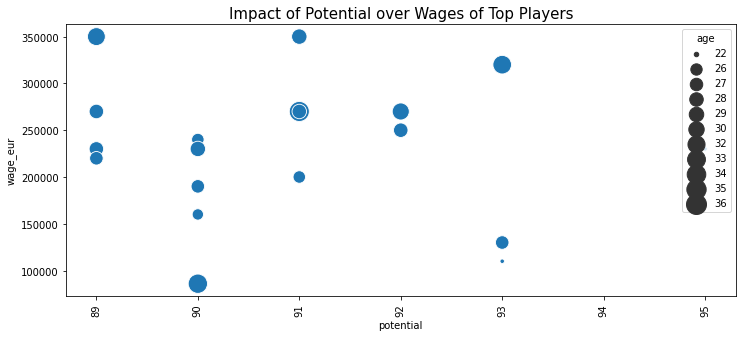

In [66]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=top20['potential'] ,y = top20['wage_eur'],size=top20["age"],sizes=(20, 400), legend="full")
plt.title('Impact of Potential over Wages of Top Players', size = 15)
plt.xticks(rotation=90)
plt.show()

Wages are independent to potential of top 20 players

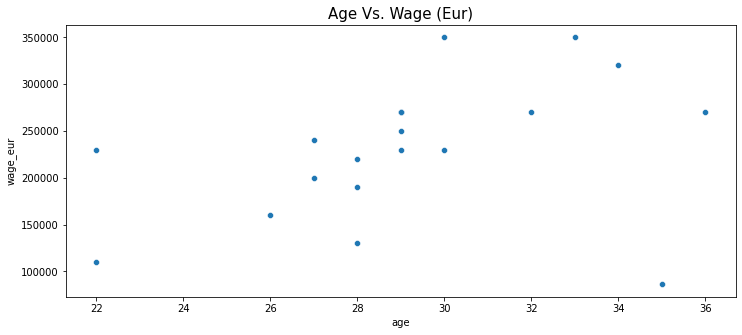

In [67]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = top20["age"],y=top20['wage_eur'])
plt.title('Age Vs. Wage (Eur)', size = 15)
plt.show()

It is observed that experienced player has got more wages

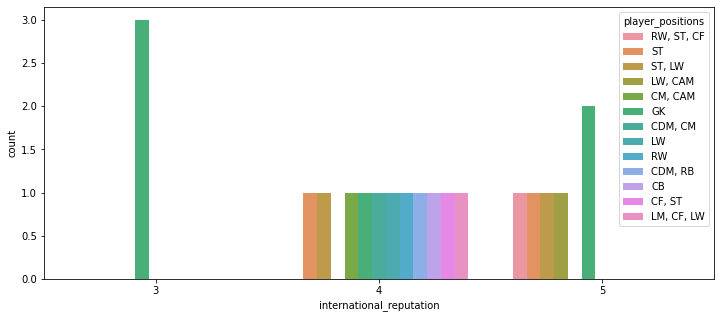

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(top20['international_reputation'],hue=top20['player_positions'])
plt.show()

Highly reputed players have Goalkeeper as their position while playing

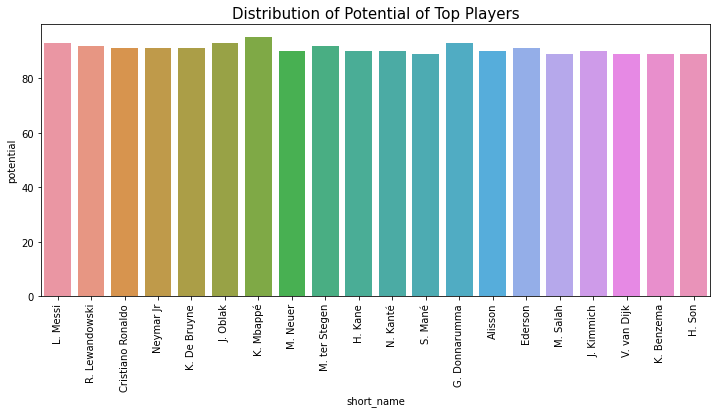

In [69]:
plt.figure(figsize=(12,5))
sns.barplot(x=top20['short_name'] ,y = top20['potential'])
plt.title('Distribution of Potential of Top Players', size = 15)
plt.xticks(rotation=90)
plt.show()

K.Mbappe has the highest potential in top 20 players.

In [70]:
top20.loc[top20['potential'].idxmax()]


sofifa_id                                                      231747
player_url          https://sofifa.com/player/231747/kylian-mbappe...
short_name                                                  K. Mbappé
long_name                                        Kylian Mbappé Lottin
player_positions                                               ST, LW
                                          ...                        
gk                                                               18+3
player_face_url     https://cdn.sofifa.net/players/231/747/22_120.png
club_logo_url                  https://cdn.sofifa.net/teams/73/60.png
club_flag_url                     https://cdn.sofifa.net/flags/fr.png
nation_flag_url                   https://cdn.sofifa.net/flags/fr.png
Name: 6, Length: 103, dtype: object

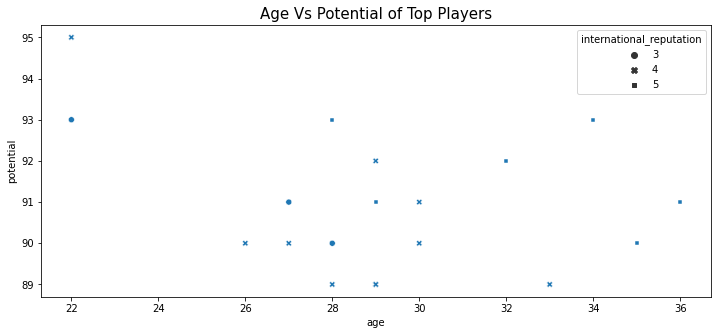

In [71]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = top20, x='age',y='potential',style='international_reputation')
plt.title('Age Vs Potential of Top Players', size = 15)
plt.show()

Highly reputed players are experienced players.

It is observed that youngest player has highest potential with good international reputation.

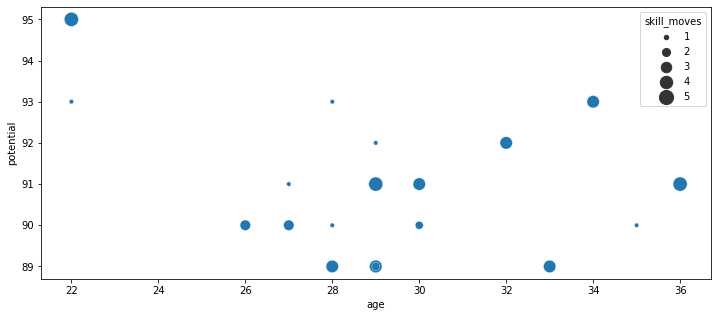

In [72]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = top20,x='age',y='potential',size='skill_moves',sizes=(20, 200), legend="full")
plt.show()

Age has no dependence over potential.

Skills moves has no dependence on age or potential

In [73]:
plt.figure(figsize = (12,5))
fig = px.scatter(top20,x='age',y='potential', color='international_reputation',
                 size="skill_moves", hover_data=['nationality_name','short_name'])
fig.show()

<Figure size 864x360 with 0 Axes>

K. Mbappe and Cristiano Ronaldo have highly skilled moves with greatest international reputation.

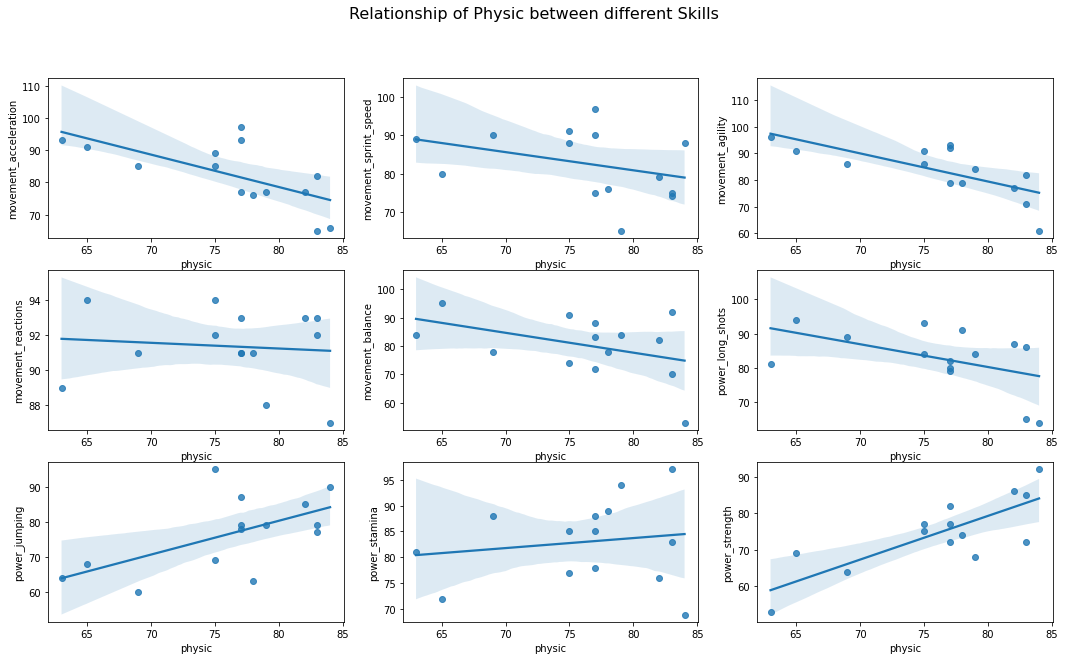

In [74]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
plt.suptitle('Relationship of Physic between different Skills', size = 16)
sns.regplot(ax=axes[0, 0], data=top20, x='physic', y='movement_acceleration')
sns.regplot(ax=axes[0, 1], data=top20, x='physic', y='movement_sprint_speed')
sns.regplot(ax=axes[0, 2], data=top20, x='physic', y='movement_agility')
sns.regplot(ax=axes[1, 0], data=top20, x='physic', y='movement_reactions')
sns.regplot(ax=axes[1, 1], data=top20, x='physic', y='movement_balance')
sns.regplot(ax=axes[1, 2], data=top20, x='physic', y='power_long_shots')
sns.regplot(ax=axes[2, 0], data=top20, x='physic', y= 'power_jumping')
sns.regplot(ax=axes[2, 1], data=top20, x='physic', y='power_stamina')
sns.regplot(ax=axes[2, 2], data=top20, x='physic', y='power_strength')

plt.show()

physic is highly related to power jumping, power stamina and power strength.

In [75]:
plt.figure(figsize = (12,5))
fig = px.scatter(top20,x='height_cm',y='weight_kg', color="skill_moves",
                 hover_data=['nationality_name','short_name'],title = "Height (Cms) Vs. Weight (Kgs)")
fig.show()

<Figure size 864x360 with 0 Axes>

Cristiano Ronaldo has best moves considering height and weight followed by K.Mbappe and Neymar Jr. 


In [76]:
plt.figure(figsize = (12,5))
fig = px.scatter(top20,x='height_cm',y='attacking_heading_accuracy', color="skill_moves",
                 hover_data=['nationality_name','short_name'],
                title = "Height (Cms) Vs. Attacking Heading Accuracy")
fig.show()

<Figure size 864x360 with 0 Axes>

 Cristiano Ronaldo has greatest attacking heading accuracy with the better height and excellent moves followed by R. Lewandowski and K. Benzema.
 
 There are players : V. van Dijk, H. Kane and Casemiro have best attacking heading accuracy with better height without having best moves

S. Mané has better attacking heading accuracy with better moves and average height.

In [77]:
plt.figure(figsize = (10,5))
ax = px.scatter(top20, x = 'height_cm', y = 'defending', title = 'Height (Cm) Vs. Defending Skills',
               hover_data = ['short_name'])
ax.show()

<Figure size 720x360 with 0 Axes>

The defending skills are not dependent on height

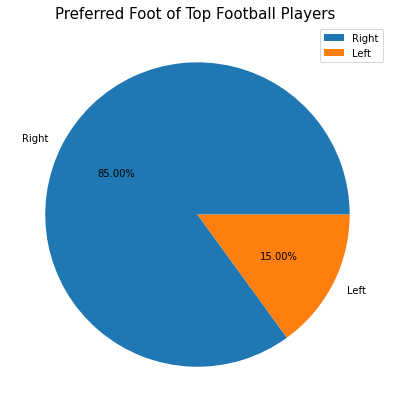

In [78]:
plt.figure(figsize = (10,7))
plt.pie(top20.preferred_foot.value_counts().values,labels= top20.preferred_foot.value_counts().index,autopct='%1.2f%%')
plt.title('Preferred Foot of Top Football Players ',color = 'black',fontsize = 15)
plt.legend()
plt.show()

Top Players preferred Right Leg.  

In [79]:
top20[top20['preferred_foot'] == 'Left']['short_name']

0     L. Messi
18     Ederson
17    M. Salah
Name: short_name, dtype: object

L. Messi, T. Courtois, M. Salah and Ederson prefer left leg while playing.

In [80]:

plt.figure(figsize = (12,5))
fig = px.bar(top20,x= 'weight_kg', y='movement_agility', 
                 hover_data=['nationality_name','short_name'],
            title = 'Weight (Kgs) Vs. Movement Agility')
fig.show()

<Figure size 864x360 with 0 Axes>

with minimum to moderate weight ,agility is highest to high of players:
Neymar Jr ,K. Mbappé ,S. Mané, L. Messi and M. Salah.

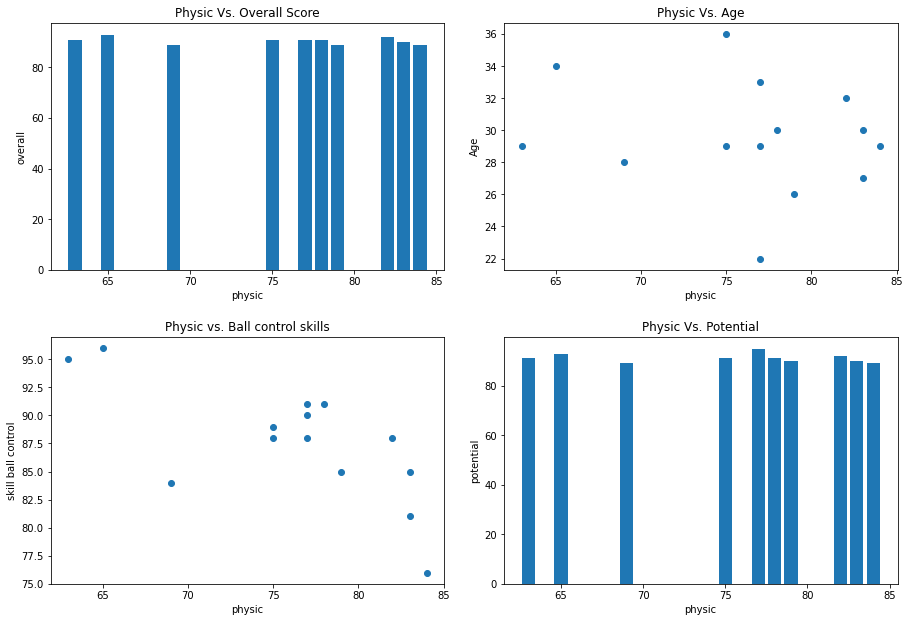

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].bar(top20['physic'],top20['overall'])
axes[0,0].set_xlabel('physic')
axes[0,0].set_ylabel('overall')
axes[0,0].set_title('Physic Vs. Overall Score')

axes[1,1].bar(top20['physic'],top20['potential'])
axes[1,1].set_xlabel('physic')
axes[1,1].set_ylabel('potential')
axes[1,1].set_title('Physic Vs. Potential')

axes[0,1].set_title('Physic Vs. Age')
axes[0,1].scatter(top20['physic'],top20['age'])
axes[0,1].set_xlabel('physic')
axes[0,1].set_ylabel('Age')


axes[1,0].set_title('Physic vs. Ball control skills')
axes[1,0].scatter(top20['physic'],top20['skill_ball_control'])
axes[1,0].set_xlabel('physic')
axes[1,0].set_ylabel('skill ball control')


plt.tight_layout(pad=2)
plt.show()

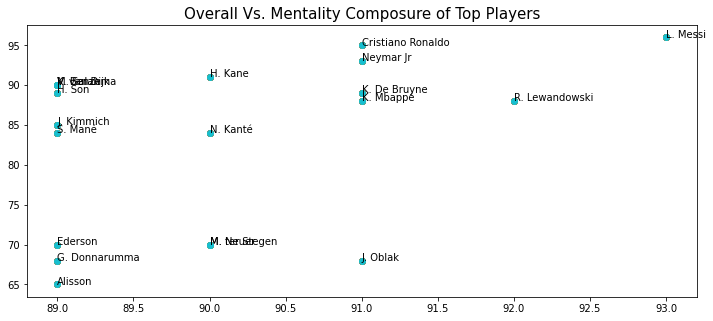

In [82]:
fig, ax = plt.subplots(figsize=(12,5))

plt.title('Overall Vs. Mentality Composure of Top Players', size =15)
for i in range(20):
    plt.scatter(top20['overall'], top20['mentality_composure'])
    plt.text(top20.iloc[i]['overall'], top20.iloc[i]['mentality_composure'], top20.iloc[i]['short_name'])

Overall score considering mentality composure of Cristiano Ronaldo, L. Messi and Neymar Jr is higher

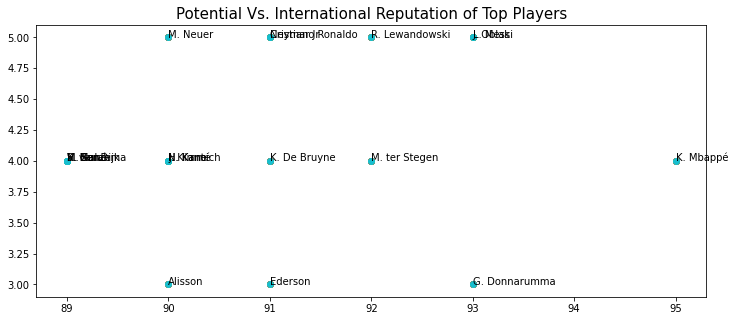

In [83]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Potential Vs. International Reputation of Top Players', size =15)

for i in range(20):
    plt.scatter(top20['potential'], top20['international_reputation'])
    plt.text(top20.iloc[i]['potential'], top20.iloc[i]['international_reputation'], top20.iloc[i]['short_name'],rotation=360)

Based on the Potential ,international reputation of L. Messi, Cristiano Ronaldo, Neymar Jr,J. Oblak,M. Neuer is higher than other top players

In [84]:
top20.sort_values('international_reputation',ascending=False)[['short_name','potential']].head(6)

short_name  potential
0           L. Messi         93
2  Cristiano Ronaldo         91
3          Neymar Jr         91
5           J. Oblak         93
7           M. Neuer         90
1     R. Lewandowski         92

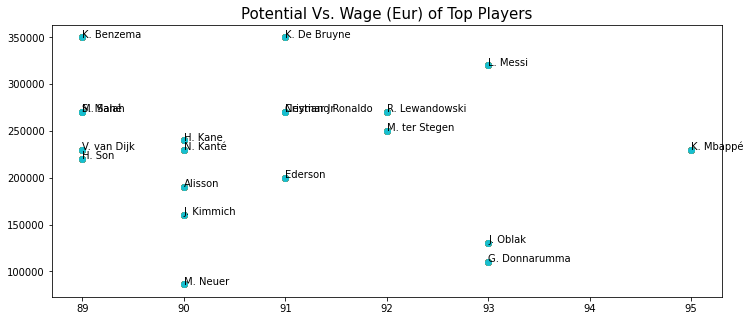

In [85]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Potential Vs. Wage (Eur) of Top Players', size =15)

for i in range(20):
    plt.scatter(top20['potential'],top20['wage_eur'])
    plt.text(top20.iloc[i]['potential'], top20.iloc[i]['wage_eur'], top20.iloc[i]['short_name'],rotation=0)

The Potential and wages has no correlation amongst them as the K Mbappe has highest potential but earns mediocre wages in top 20 players.

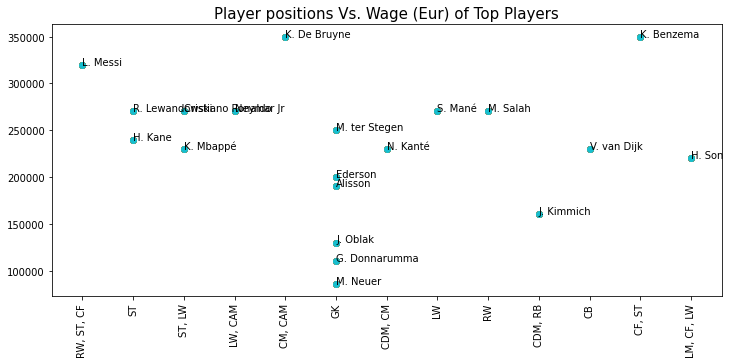

In [86]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Player positions Vs. Wage (Eur) of Top Players', size =15)

for i in range(20):
    plt.scatter(top20['player_positions'], top20['wage_eur'])
    plt.text(top20.iloc[i]['player_positions'], top20.iloc[i]['wage_eur'], top20.iloc[i]['short_name'],rotation=0)
    plt.xticks(rotation=90)

K. De Bruyne,K. Benzema,L. Messi,Casemiro,Cristiano Ronaldo and Neymar Jr earns the highest.

In [87]:
top20.sort_values('wage_eur',ascending=False)[['short_name','player_positions']].head(6)

short_name player_positions
4        K. De Bruyne          CM, CAM
11         K. Benzema           CF, ST
0            L. Messi       RW, ST, CF
16            S. Mané               LW
2   Cristiano Ronaldo           ST, LW
3           Neymar Jr          LW, CAM

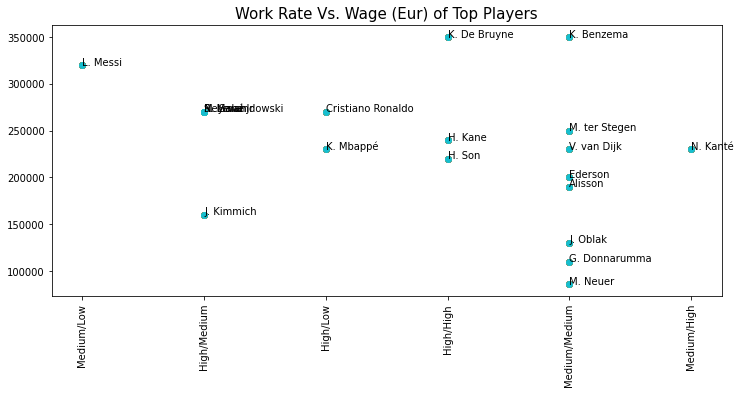

In [88]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Work Rate Vs. Wage (Eur) of Top Players', size =15)
for i in range(20):
    plt.scatter(top20['work_rate'], top20['wage_eur'])
    plt.text(top20.iloc[i]['work_rate'], top20.iloc[i]['wage_eur'], top20.iloc[i]['short_name'])
    plt.xticks(rotation=90)

K De Bryuyne and K Benzema followed by Messi and casemiro earns more wages for high work rate.

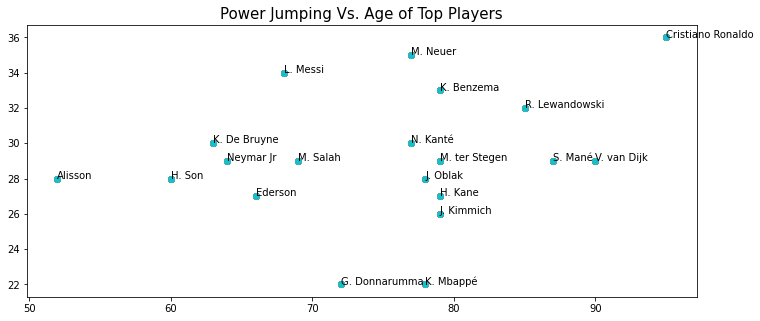

In [89]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Power Jumping Vs. Age of Top Players', size =15)
for i in range(20):
    plt.scatter(top20['power_jumping'], top20['age'])
    plt.text(top20.iloc[i]['power_jumping'], top20.iloc[i]['age'], top20.iloc[i]['short_name'])

No other player jumps higher than Cristiano Ronaldo

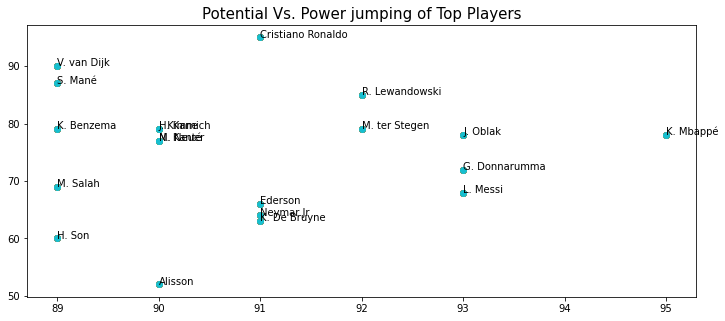

In [90]:
fig, ax = plt.subplots(figsize=(12,5))
plt.title('Potential Vs. Power jumping of Top Players', size =15)
for i in range(20):
    plt.scatter(top20['potential'],top20['power_jumping'])
    plt.text(top20.iloc[i]['potential'], top20.iloc[i]['power_jumping'], top20.iloc[i]['short_name'],rotation=0)

In [91]:
top20['potential'].corr(top20['power_jumping'])

0.007441597545071067

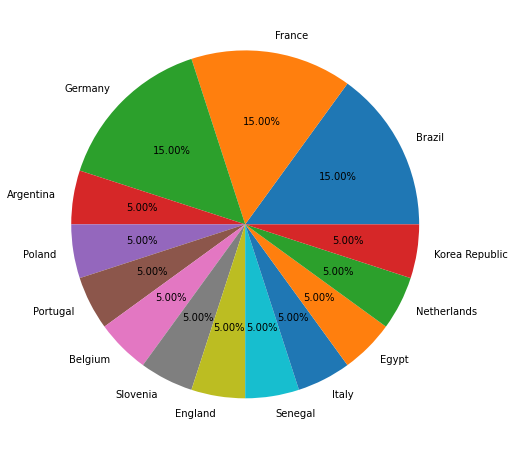

In [92]:
plt.figure(figsize=(12,8))
plt.pie(top20['nationality_name'].value_counts().values , labels= top20['nationality_name'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [93]:
top20['nationality_name'].value_counts()

Brazil            3
France            3
Germany           3
Argentina         1
Poland            1
Portugal          1
Belgium           1
Slovenia          1
England           1
Senegal           1
Italy             1
Egypt             1
Netherlands       1
Korea Republic    1
Name: nationality_name, dtype: int64

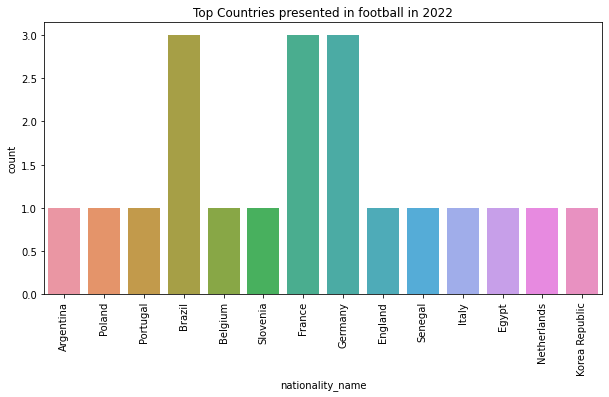

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(top20['nationality_name'])
plt.xticks(rotation=90)
plt.title('Top Countries presented in football in 2022')
plt.show()

Brazil, France, Germany followed by Belgium presented maximum times in FIFA

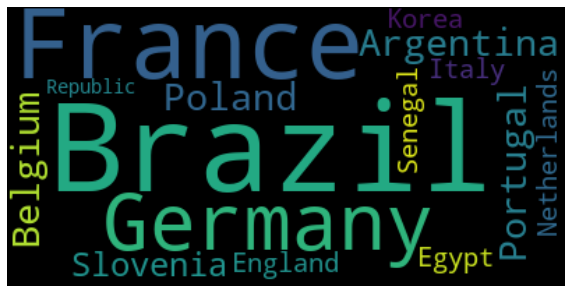

In [95]:
nationality_name = " ".join(n for n in top20['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [96]:
top20.loc[[df['power_jumping'].idxmax()]]

sofifa_id                                         player_url  \
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

          short_name                            long_name player_positions  \
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   

   overall  potential   value_eur  wage_eur  age  ...    lb   lcb    cb   rcb  \
2       91         91  45000000.0  270000.0   36  ...  60+3  53+3  53+3  53+3   

     rb    gk                                    player_face_url  \
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   

                            club_logo_url  \
2  https://cdn.sofifa.net/teams/11/60.png   

                             club_flag_url  \
2  https://cdn.sofifa.net/flags/gb-eng.png   

                       nation_flag_url  
2  https://cdn.sofifa.net/flags/pt.png  

[1 rows x 103 columns]

Cristiano Ronaldo's power_jumping is the highest among all the players.

In [97]:
top20.sort_values('power_jumping',ascending= False)[['power_jumping','short_name']].head(5)

power_jumping         short_name
2              95  Cristiano Ronaldo
15             90        V. van Dijk
16             87            S. Mané
1              85     R. Lewandowski
11             79         K. Benzema

No one jumps higher than Cristiano Ronaldo

In [98]:
top20[top20['potential'] >= 85].sort_values(by=['wage_eur'], ascending = False)['short_name']

4          K. De Bruyne
11           K. Benzema
0              L. Messi
16              S. Mané
2     Cristiano Ronaldo
3             Neymar Jr
17             M. Salah
1        R. Lewandowski
8         M. ter Stegen
9               H. Kane
15          V. van Dijk
10             N. Kanté
6             K. Mbappé
13               H. Son
18              Ederson
20              Alisson
19           J. Kimmich
5              J. Oblak
21        G. Donnarumma
7              M. Neuer
Name: short_name, dtype: object

In [99]:
top20.groupby(['preferred_foot']).count()[['potential']]

potential
preferred_foot           
Left                    3
Right                  17

Maximum players prefer right leg

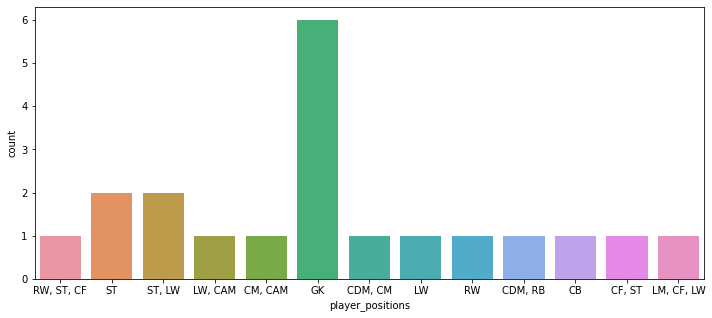

In [100]:
plt.figure(figsize = (12,5))
sns.countplot(top20['player_positions'])
plt.show()

In [101]:
top20[top20['player_positions'] == 'GK']

sofifa_id                                         player_url  \
5      200389  https://sofifa.com/player/200389/jan-oblak/220002   
7      167495  https://sofifa.com/player/167495/manuel-neuer/...   
8      192448  https://sofifa.com/player/192448/marc-andre-te...   
21     230621  https://sofifa.com/player/230621/gianluigi-don...   
20     212831  https://sofifa.com/player/212831/alisson-ramse...   
18     210257  https://sofifa.com/player/210257/ederson-santa...   

       short_name                  long_name player_positions  overall  \
5        J. Oblak                  Jan Oblak               GK       91   
7        M. Neuer         Manuel Peter Neuer               GK       90   
8   M. ter Stegen      Marc-André ter Stegen               GK       90   
21  G. Donnarumma       Gianluigi Donnarumma               GK       89   
20        Alisson      Alisson Ramsés Becker               GK       89   
18        Ederson  Ederson Santana de Moraes               GK       89   

    potential    value_eur  wage_eur  age  ...    lb   lcb    cb   rcb    rb  \
5          93  112000000.0  130000.0   28  ...  32+3  33+3  33+3  33+3  32+3   
7          90   13500000.0   86000.0   35  ...  35+3  34+3  34+3  34+3  35+3   
8          92   99000000.0  250000.0   29  ...  31+3  33+3  33+3  33+3  31+3   
21         93  119500000.0  110000.0   22  ...  31+3  31+3  31+3  31+3  31+3   
20         90   82000000.0  190000.0   28  ...  30+3  31+3  31+3  31+3  30+3   
18         91   94000000.0  200000.0   27  ...  36+3  35+3  35+3  35+3  36+3   

      gk                                    player_face_url  \
5   89+3  https://cdn.sofifa.net/players/200/389/22_120.png   
7   88+2  https://cdn.sofifa.net/players/167/495/22_120.png   
8   88+3  https://cdn.sofifa.net/players/192/448/22_120.png   
21  87+3  https://cdn.sofifa.net/players/230/621/22_120.png   
20  87+3  https://cdn.sofifa.net/players/212/831/22_120.png   
18  87+3  https://cdn.sofifa.net/players/210/257/22_120.png   

                              club_logo_url  \
5   https://cdn.sofifa.net/teams/240/60.png   
7    https://cdn.sofifa.net/teams/21/60.png   
8   https://cdn.sofifa.net/teams/241/60.png   
21   https://cdn.sofifa.net/teams/73/60.png   
20    https://cdn.sofifa.net/teams/9/60.png   
18   https://cdn.sofifa.net/teams/10/60.png   

                              club_flag_url  \
5       https://cdn.sofifa.net/flags/es.png   
7       https://cdn.sofifa.net/flags/de.png   
8       https://cdn.sofifa.net/flags/es.png   
21      https://cdn.sofifa.net/flags/fr.png   
20  https://cdn.sofifa.net/flags/gb-eng.png   
18  https://cdn.sofifa.net/flags/gb-eng.png   

                        nation_flag_url  
5   https://cdn.sofifa.net/flags/si.png  
7   https://cdn.sofifa.net/flags/de.png  
8   https://cdn.sofifa.net/flags/de.png  
21  https://cdn.sofifa.net/flags/it.png  
20  https://cdn.sofifa.net/flags/br.png  
18  https://cdn.sofifa.net/flags/br.png  

[6 rows x 103 columns]

GoalKeeper is the highest chosen position by J. Oblak, M. Neuer, M. ter Stegen,T. Courtois and Ederson.

In [102]:
top20_skill = top20[top20.skill_moves == 5][["short_name","player_positions","overall","potential","wage_eur","age",'work_rate',
                                             'nationality_name','height_cm','weight_kg'
]]
top20_skill

short_name player_positions  overall  potential  wage_eur  age  \
2  Cristiano Ronaldo           ST, LW       91         91  270000.0   36   
3          Neymar Jr          LW, CAM       91         91  270000.0   29   
6          K. Mbappé           ST, LW       91         95  230000.0   22   

     work_rate nationality_name  height_cm  weight_kg  
2     High/Low         Portugal        187         83  
3  High/Medium           Brazil        175         68  
6     High/Low           France        182         73

Portugal, Brazil and France has players with good physic and skills. 

Cristiano Ronaldo,Neymar Jr and K. Mbappé has highest potential.

International Reputation has no relation on wages.

In [103]:
fig = px.scatter(x = top20['potential'],  y = top20['value_eur'],color=top20["nationality_name"],size = top20['skill_moves'],
                title= 'Impact of Potential on Value(Eur) of Top Players ')
fig.show()

In [104]:
 top20.sort_values('skill_moves',ascending = False)[['value_eur',"nationality_name",'potential']]

value_eur nationality_name  potential
2    45000000.0         Portugal         91
3   129000000.0           Brazil         91
6   194000000.0           France         95
0    78000000.0        Argentina         93
1   119500000.0           Poland         92
11   66000000.0           France         89
17  101000000.0            Egypt         89
16  101000000.0          Senegal         89
13  104000000.0   Korea Republic         89
4   125500000.0          Belgium         91
9   129500000.0          England         90
19  108000000.0          Germany         90
15   86000000.0      Netherlands         89
10  100000000.0           France         90
8    99000000.0          Germany         92
7    13500000.0          Germany         90
21  119500000.0            Italy         93
20   82000000.0           Brazil         90
18   94000000.0           Brazil         91
5   112000000.0         Slovenia         93

In [105]:
px.bar(top20,x="height_cm",y = "power_jumping",color = 'power_long_shots')

In [106]:
px.bar(top20,x="mentality_penalties",y = "nationality_name",color = 'power_long_shots')

Brazil has power long shots followed by Belgium and Argentina.

In [107]:
top20.sort_values(['power_jumping'],ascending = False)[['short_name','power_jumping','value_eur',"nationality_name",'potential']]

short_name  power_jumping    value_eur nationality_name  potential
2   Cristiano Ronaldo             95   45000000.0         Portugal         91
15        V. van Dijk             90   86000000.0      Netherlands         89
16            S. Mané             87  101000000.0          Senegal         89
1      R. Lewandowski             85  119500000.0           Poland         92
11         K. Benzema             79   66000000.0           France         89
8       M. ter Stegen             79   99000000.0          Germany         92
9             H. Kane             79  129500000.0          England         90
19         J. Kimmich             79  108000000.0          Germany         90
5            J. Oblak             78  112000000.0         Slovenia         93
6           K. Mbappé             78  194000000.0           France         95
10           N. Kanté             77  100000000.0           France         90
7            M. Neuer             77   13500000.0          Germany         90
21      G. Donnarumma             72  119500000.0            Italy         93
17           M. Salah             69  101000000.0            Egypt         89
0            L. Messi             68   78000000.0        Argentina         93
18            Ederson             66   94000000.0           Brazil         91
3           Neymar Jr             64  129000000.0           Brazil         91
4        K. De Bruyne             63  125500000.0          Belgium         91
13             H. Son             60  104000000.0   Korea Republic         89
20            Alisson             52   82000000.0           Brazil         90

In [108]:
px.bar(top20,y='movement_agility',x = "weight_kg",title = "Weight( Kgs.) Vs. Movement Agility")

Sudden fall in movement agility once the weight increases after 83 kgs of player's weight.

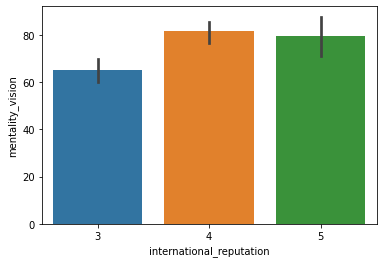

In [109]:
sns.barplot(data = top20, x='international_reputation', y='mentality_vision')
plt.show()

In [110]:
fig = px.scatter(top20, x="age", y="wage_eur", title='Age Vs. Wages')
fig.show()

Experienced player has better wages

In [111]:
fig = px.line(top20, x=  'movement_acceleration',y="pace", title='Movement Acceleration Vs. Pace',
                color = 'nationality_name',hover_data = ['short_name','nationality_name','age'])
fig.show()

Acceleration is directly dependent on Pace of the player

In [112]:

fig = px.scatter(top20, x=  'movement_acceleration',y= 'movement_sprint_speed', title='Acceleration Vs. Sprint peed',
                color = 'nationality_name',hover_data = ['short_name','nationality_name','age'])
fig.show()


Acceleration rests on sprint speed.

In [113]:
fig = px.bar(top20, x=  'movement_acceleration',y= 'physic', title='Acceleration Vs. Physic',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Acceleration of player revolves around better physic

In [114]:

fig = px.scatter(top20, x=  'movement_acceleration',y= 'movement_sprint_speed', title='Acceleration Vs. sprint Speed',
                size = 'skill_dribbling',
                 color = 'movement_balance',hover_data = ['short_name','nationality_name','age'])
fig.show()

When players have Acceleration and sprint speed above 90 then there is possibility of player become tired if they lack balance

In [115]:
fig = px.scatter(top20, x= 'mentality_aggression',y="shooting", title='Mentality aggression Vs. Shooting',
                color =  'skill_ball_control',hover_data = ['short_name','nationality_name','age'])
fig.show()

Shooting the ball is only possible with mental aggression which is possible only with proficient ball control skills.

In [116]:
fig = px.scatter(top20, x= 'mentality_aggression',y="defending_sliding_tackle", title='Mentality aggression Vs. Defending sliding tackle',
                color = 'nationality_name',hover_data = ['short_name','nationality_name','age'])
fig.show()

Mentality Aggression brings better defending sliding tackle

In [117]:
fig = px.scatter(top20, x= 'mentality_aggression',y="power_jumping", title='Mentality aggression Vs. Power_jumping',
                color = 'nationality_name',hover_data = ['short_name','nationality_name','age'])
fig.show()

Mentality Aggression contributes to a power jumping.

Cristiano Ronaldo jumps highest with high mental aggression

In [118]:
fig = px.scatter(top20, x= 'mentality_aggression',y='defending_standing_tackle', title='Mentality aggression Vs. Defending standing tackle',
                color = 'nationality_name',size = 'height_cm',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Best Defending Standing tackle is observed with highest Mentality Aggression .

In [119]:
fig = px.scatter(top20, x= 'mentality_aggression',y='mentality_penalties',
                title='Mentality aggression Vs. Penalty',
                color = 'nationality_name',size = 'height_cm',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Highest aggresion bring large penalties.

Neymar Jr. has higest penalties.

In [120]:
fig = px.scatter(top20, x=  'movement_agility',y= 'movement_balance', title='Agility Vs. Balance',
                 symbol = 'player_positions',
                 hover_data = ['short_name','nationality_name','age'])
fig.show()

Agility and balance bring fluidity in the game.

In [121]:
fig = px.scatter(top20, x= 'movement_agility',y='skill_dribbling', 
                title='Agility Vs. Dribbling',
                color = 'nationality_name',size = 'height_cm',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Better Agility offers better dribbling skills.

In [122]:
fig = px.scatter(top20, x= 'movement_agility',y='pace', 
                title='Agility Vs. Pace',
                color = 'nationality_name',size =  'skill_ball_control',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Agility has huge impace on Pace.

Cristiano ronaldo and L. Messi hits long shots with best agility while playing.

In [123]:

fig = px.line(top20, x= 'skill_ball_control',y=  'skill_dribbling',
                title='Ball Control Vs. Dribbling',
                color = 'nationality_name',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Dribbling has influence on the ball control skills of the player

In [124]:
fig = px.scatter(top20, y=  'mentality_composure',x=  'skill_dribbling',
                title='Dribbling Vs. Mentality Composure',
                size =  'power_long_shots',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Composure is the attribute which determines at what distance player starts feeling pressure from opponent.

Higher the value , better chances of player performs good against opponent.

In [125]:
fig = px.scatter(top20, y=  'mentality_composure',x=  'skill_dribbling',
                title='Dribbling Vs. Mentality Composure',
                symbol =  'pace',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

In [126]:
fig = px.scatter(top20, y=  'skill_moves',x=  'skill_dribbling',
                title='Dribbling Vs. Skill Moves',
                size =  'power_long_shots',
                 color = 'nationality_name',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Dribbling keeps ball closer considering skill moves which hard for opponent to win it off.

In [127]:
fig = px.bar(top20, x= 'skill_ball_control',y= 'defending_standing_tackle',
                title='Ball Control Vs. Standing_tackle',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Players with excellent Ball control skills can accomplish great standing tackle skills.

In [128]:
fig = px.scatter(top20, x= 'skill_ball_control',y=  'defending_sliding_tackle',
                title='Ball Control Vs. Sliding_tackle',
                color = 'nationality_name',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Players with excellent Ball control skills can give better sliding tackle.

In [129]:
fig = px.bar(top20, x= 'attacking_crossing',y= 'passing',
                title='Crossing Vs. Passing',color ="nationality_name",
                hover_data = ['short_name','nationality_name','age'])
fig.show()

How accurately player crosses the ball while passing is determined by above mentioned barchart.

In [130]:
fig = px.bar(top20, x= 'attacking_crossing',y=  'skill_ball_control',
                title='Crossing Vs. Ball Control',color ="nationality_name",
                hover_data = ['short_name','nationality_name','age'])
fig.show()

In [131]:
fig = px.scatter(top20, x= 'skill_curve',y=  'passing',
                title='Curve Vs. Passing',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

In [132]:
fig = px.scatter(top20, x= 'skill_curve',y=  'shooting',
                title='Curve Vs.Shooting',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Better Curve during Passing or Shooting the ball makes difficult for an opponent to defend against

In [133]:

fig = px.scatter(top20, x= 'defending_marking_awareness',y=  'defending',
                title='Defending Awareness Vs. Defending Skills',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Marking is important for a player to defend from passing or crossing a ball.

In [134]:

fig = px.scatter(top20, x= 'skill_fk_accuracy',y=  'passing',
                title='Free Kick Accuracy Vs. Passing',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

In [135]:
fig = px.scatter(top20, x= 'skill_fk_accuracy',y=   'skill_long_passing',
                title='Free Kick Accuracy Vs. Passing',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

The higher the value the better the accuracy of a direct free kick on goal.

In [136]:
fig = px.scatter(top20, x= 'skill_fk_accuracy',y=   'skill_curve',
                title='Free Kick Accuracy Vs. Curve',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Players with  free kick accuracy and curve adds more winning probability.

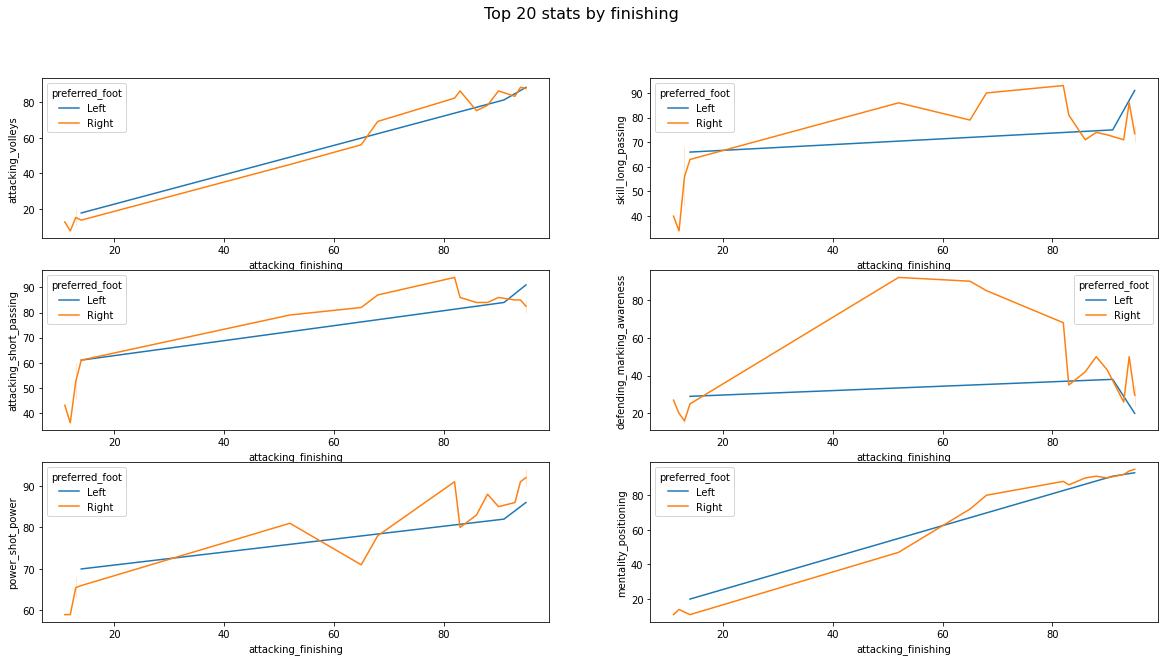

In [137]:
fig,axes=plt.subplots(3,2,figsize=(20,10))
fig.suptitle('Top 20 stats by finishing',size=16)
sns.lineplot(ax=axes[0,0],data=top20,x='attacking_finishing',y= 'attacking_volleys',hue='preferred_foot')
sns.lineplot(ax=axes[0,1],data=top20,x='attacking_finishing',y='skill_long_passing',hue='preferred_foot')
sns.lineplot(ax=axes[1,0],data=top20,x='attacking_finishing',y= 'attacking_short_passing',hue='preferred_foot')
sns.lineplot(ax=axes[1,1],data=top20,x='attacking_finishing',y='defending_marking_awareness',hue='preferred_foot')
sns.lineplot(ax=axes[2,0],data=top20,x='attacking_finishing',y= 'power_shot_power',hue='preferred_foot')
sns.lineplot(ax=axes[2,1],data=top20,x='attacking_finishing',y= 'mentality_positioning',hue='preferred_foot')
fig.show()

Finishing is accuracy shot using foot inside the penalty area.

Higher the finishing , better is the volleys, shot pass,long pass, shot power and positioning

In [138]:
fig = px.scatter(top20, x=  'movement_reactions',y= 'skill_dribbling',
                title='reactions Vs. Dribbling',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

Reaction is how quickly player respondes to any situation happening around him.

L.Messi and Cristiano Ronaldo are very quick to dribbling. 

In [139]:

fig = px.scatter(top20, x= 'skill_fk_accuracy',y= 'attacking_short_passing',
                title='reactions Vs. Dribbling',color = 'pace',
                hover_data = ['short_name','nationality_name','age'])
fig.show()

While passing over a short distance, accuracy and pace are most important factors.

In [140]:
px.scatter(top20,x='height_cm',y = "defending",hover_data=['short_name',"nationality_name"],title= 'Height(Cms) Vs. defending Skills')

There is no dependency of height on defending skills but V.van Dijik has best defending skills with advantage of height.

In [141]:
fig = px.scatter(top20, x= 'height_cm', y= 'goalkeeping_diving',title='Height (Cm)  Vs. Goalkeeping Diving Skills',
                 hover_data =["short_name","nationality_name","age"])
fig.show()

Height is an advantage for GoalKeeping Diving.

G. Donnarumma has greatest GoalKeeping Diving skills with greatest height among all Top players with age of 22.

In [142]:
fig = px.scatter(top20,y = 'skill_fk_accuracy', x=  'goalkeeping_kicking',title='Height (Cm) Vs. Goalkeeping Kicking Skills',
                 size = "power_long_shots", hover_data =["short_name","nationality_name"])
fig.show()

Having advantage of height below mentioned players have good goalkeeping diving and goalkeeping kicking skills:

M. Neuer,M. ter Stegen ,T. Courtois and Ederson.

* M. Neuer has best goalkeeping diving skills
* Ederson has best goalkeeping kicking skills

In [143]:
fig = px.scatter(top20, x= 'height_cm', y= 'goalkeeping_reflexes',title='Height (Cm) Vs. Goalkeeping reflexes Skills',
                 hover_data =["short_name","nationality_name"],color =  'movement_agility')
fig.show()

Better Height provides better Goalkeeping_reflexes

In [144]:

fig = px.scatter(top20, x= 'height_cm', y= 'skill_dribbling',title='Height (Cm)  Vs.Dribbling Skills',hover_data =["short_name","nationality_name"])
fig.show()

Better dribbling are observed in players with height of 168cms to 188 cms

In [145]:
fig = px.scatter(top20, x= 'height_cm', y= 'attacking_volleys',color = "player_positions",
                 title='Height (Cm)  Vs. Attacking volleys',
                 hover_data =["short_name","nationality_name"]
                 )
fig.show()

K.Benzema, R.Lewandowski and H.Kane has best attacking volley with an advantage of height.

Whereas L. Messi, Neymar Jr. and M.salah has better attacking volley irrespective of having average height.

In [146]:
fig = px.scatter(top20, x="skill_curve", y="defending_standing_tackle", title='Curve Vs.Standing tackle',
                hover_data = ['nationality_name','short_name','age'])
fig.show()

In [147]:
fig = px.scatter(top20, x="skill_curve", y='defending_sliding_tackle',title='Curve Vs.Sliding tackle',
                hover_data = ['nationality_name','short_name','age'])
fig.show()

In [148]:
fig = px.scatter(top20, x="skill_curve", y="passing", title='Curve Vs. Passing',
                hover_data = ['nationality_name','short_name','age'])
fig.show()

In [149]:
fig = px.scatter(top20, x="skill_curve", y="shooting", title='Curve Vs. Shooting',
                hover_data = ['nationality_name','short_name','age'])
fig.show()

Curve is used to measures the player’s ability to curve the ball when passing and shooting which is difficult to defend against.

Cristiano Ronaldo has highest Shooting with excellent ball Curling Skills.

K.D. Bruyne has best ball Passing skills considering Curve.

N. Kanté, J. Kimmich and V. van Dijk have proficient tackling skills.

In [150]:
fig = px.scatter(top20, x="mentality_vision", y="skill_long_passing", title='Vision Vs. Shooting',
                hover_data = ['nationality_name','short_name','age'])
fig.show()

K.D. Bruyne and L.Messi has best vision for Long Passes.

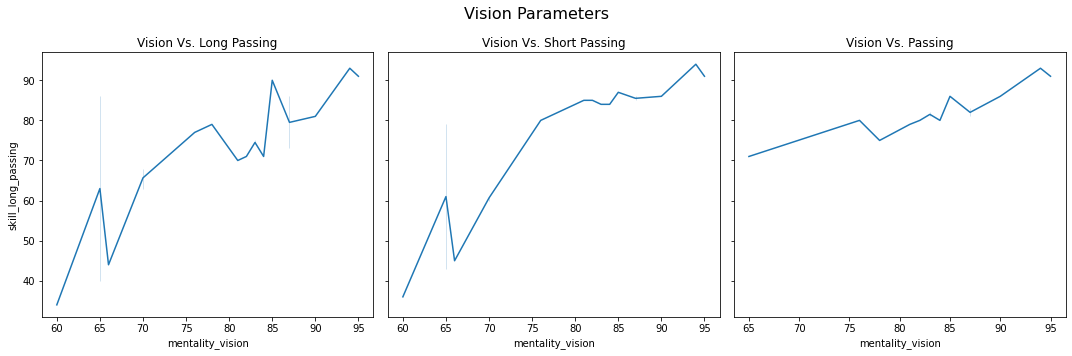

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Vision Parameters',size = 16)


sns.lineplot(ax=axes[0],data = top20, x= 'mentality_vision', y= 'skill_long_passing')
axes[0].set_title('Vision Vs. Long Passing')

sns.lineplot(ax=axes[1],data = top20, x= 'mentality_vision', y=  'attacking_short_passing')
axes[1].set_title('Vision Vs. Short Passing')

sns.lineplot(ax=axes[2],data = top20, x= 'mentality_vision', y= 'passing')
axes[2].set_title('Vision Vs. Passing')

plt.tight_layout()
plt.show()

Better the Vision attribute, the wider your player will see in order to locate his teammates and therefore the bigger are the chances of a successful long pass.

In [152]:
fig = px.bar(top20, x="power_strength", y="defending", title='Strength Vs. Defending',color = 'player_positions',
                hover_data = ['nationality_name','short_name','age','height_cm','weight_kg','physic'])
fig.show()

V. van Dijk can play defensive having an advantage of greatest physical strength. 
Whereas J.kimmich and N.kante is with average strength and best defending skills.

It is observed that this attribute plays an important role for the players playing as striker.

In [153]:
fig = px.bar(top20, x="power_stamina", y="physic",hover_data = ['nationality_name','short_name','age','height_cm','weight_kg','physic','movement_sprint_speed'])
fig.show()

Stamina is directly dependent on the better pphysic.

M.Salah and H.Son has best stamina. 

In [154]:
fig = px.bar(top20, x="attacking_crossing", y="passing",hover_data = ['nationality_name','short_name','age','height_cm','weight_kg','physic','movement_sprint_speed'])
fig.show()


This attribute determines how accurately player crosses ball during passing.

In [155]:
#players who are Goalkeepers.

top20[top20['player_positions'] == 'GK'][['short_name','potential','age','nationality_name']].style.background_gradient(cmap = 'plasma')

Oblak, M. Neuer,M. ter Stegen,G. Donnarumma,Alisson and Ederson plays as a goalkeeper.

In [156]:
fig = px.bar(top20, x="nationality_name", y="player_positions",color = 'nationality_name',hover_data = ['nationality_name','short_name','age','height_cm','weight_kg','physic','movement_sprint_speed'])
fig.show()

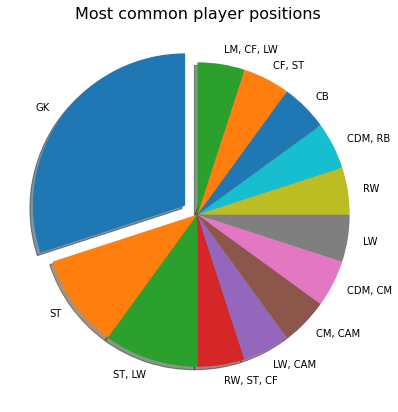

In [157]:
plt.figure(figsize= (12,7))
plt.pie(top20['player_positions'].value_counts().values,labels=top20['player_positions'].value_counts().index,
        startangle = 90,shadow = True,
    explode = [0.1, 0, 0, 0,0,0,0,0, 0, 0, 0,0,0])
#plt.pie(player_pos_count, labels = player_pos, autopct = '%1.2f%%')
plt.title('Most common player positions', fontsize=16)
plt.show()

GoalKeeper is the most common position observed in top 20 players.

# **Conclusion**

From the analysis of given data, we can summerize that, 

1. **Center back** is the most common player position.
2. International reputation plays an important role in wages of the player
3. **Brazil, Portugal, France and Argentina **has players with best skill moves
4. Age of the player does not play significant role in player's international reputation.
   K. Miura ,the oldest playest does not have good international reputation.
5. Potential and Wages are is highly correlated.     
6. Good international reputation has better wages and value also increases.  
7. Players with Height between 165cm to 195cm have good defending skills
8. Most of the players prefer right leg while playing
9. It is observed that players with good potential with not so good international reputation.
10. Players with High workrate has high wages.
11. **England, Germany, Spain, France, Argentina and Brazil** has presented highest number of times.
12. **K.Mbappe** has the highest potential in top 20 players.


whereas for top 20 players scenario is different:

* **"Goalkeeper"** is the most common player position.
* The international reputation has no significant impact over wages.
* **Portugal, Brazil and France** has players with good physic and skills.
* Highly reputed players are experienced players.
* The Potential and wages has no correlation amongst them as the K Mbappe has highest potential but   earns mediocre wages in top 20 players.
* Better dribbling are observed in players with height of 168cms to 188 cms.
* Top Players mostly prefer Right Leg.
* L. Messi, T. Courtois, M. Salah and Ederson prefer left leg while playing.
* International Reputation has no relation on wages.
* K. De Bruyne,K. Benzema,L. Messi,Casemiro,Cristiano Ronaldo and Neymar Jr earns the highest.
* France, Germany, Brazil and Belgium has highest presentation.
* There is no dependency of height on defending skills.
* **Cristiano Ronaldo** has greatest attacking heading accuracy with the better height and excellent moves   followed by R. Lewandowski and K. Benzema.
* It is observed that youngest player has highest potential with good international reputation.
* **K. De Bruyne,K. Benzema,L. Messi,Casemiro,Cristiano Ronaldo and Neymar Jr** earns the highest.
* **Cristiano Ronaldo,Neymar Jr and K. Mbappé **has highest potential.
* Overall score considering mentality composure of **Cristiano Ronaldo, L. Messi and Neymar Jr** is higher.
* Based on the Potential ,international reputation of **L. Messi, Cristiano Ronaldo, Neymar Jr, J. Oblak, M. Neuer** is higher than other top players.
* Sudden fall in movement agility once the weight increases after 83 kgs of player's weight.
* Neymar Jr. has higest penalties.
* **G. Donnarumma** has greatest GoalKeeping Diving skills with greatest height among all Top players with age of 22.
* Height is always an advantage for Goalkeeping_reflexes, Goalkeeping diving and Goalkeeping kicking , attacking volley and dribbling skills.
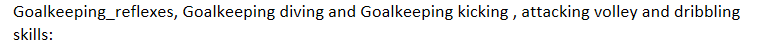
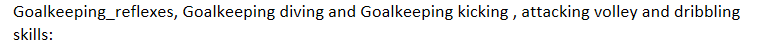
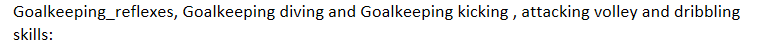